# Tinder project ❤️

In the contemporary landscape of human relationships, dating apps and speed dating have emerged as major social phenomena, redefining the way individuals interact and form connections. The rise of these digital platforms has opened up new avenues for exploring the intricate dynamics of courtship and dating. This data analysis project aims to closely examine these phenomena, employing advanced analytical methods to decipher the behaviors, preferences, and underlying patterns that shape these fleeting yet significant interactions.

Data Exploration Ideas :
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

Import librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

Import fichier

In [2]:
missing_types = ["NA", ""]
df = pd.read_csv('Speed_dating.csv',na_values=missing_types, encoding = "ISO-8859-1")

In [3]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## 1- Cleaning

Overview of the database:

In [599]:
print("The database contains",df.shape[0], "observations, and",len(df.columns), "properties.")
print("The data was collected during",df['wave'].values.max(),"waves of speed dating.")
print("A total of ",df['iid'].values.max(), "individuals participated in this experiment.")
df_gender = df.groupby('iid')['gender'].first().reset_index()
decompte_femme = df_gender[df_gender['gender'] == 0].shape[0]
decompte_homme = df_gender[df_gender['gender'] == 1].shape[0]
print("In this experiment, the distribution of the studied population is as follows:", decompte_femme,' women and',decompte_homme, "men.")

The database contains 8378 observations, and 195 properties.
The data was collected during 21 waves of speed dating.
A total of  552 individuals participated in this experiment.
In this experiment, the distribution of the studied population is as follows: 274  women and 277 men.


We are looking at what is missing :

In [600]:
pd.DataFrame(df.isna().sum().values.reshape(1,-1), columns= df.columns)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,...,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


Let's create a visualization to see the proportion of missing values across the entire dataset:

In [601]:
colonnes_manquantes = df.columns[df.isnull().any()].tolist()
nombre_valeurs_manquantes = df.isnull().sum()
taux_valeurs_manquantes = (df.isnull().mean() * 100).round(2)
resultats = pd.DataFrame({'Colonnes_manquantes': colonnes_manquantes,
                          'Nombre_valeurs_manquantes': nombre_valeurs_manquantes[colonnes_manquantes],
                          'Taux_valeurs_manquantes (%)': taux_valeurs_manquantes[colonnes_manquantes]})
resultats = resultats.sort_values(by='Taux_valeurs_manquantes (%)')
taux_valeurs_manquantes_total = (df.isnull().mean().mean() * 100).round(2)
taux_valeurs_presents_total = 100 - taux_valeurs_manquantes_total
valeurs = [taux_valeurs_manquantes_total, taux_valeurs_presents_total]
etiquettes = ['Missing values', 'Present values']
fig = go.Figure(data=[go.Pie(labels=etiquettes, values=valeurs)])
fig.show()
print("The rate of missing values in the entire database is : ", taux_valeurs_manquantes_total, "%")

The rate of missing values in the entire database is :  26.44 %


We fill in missing values that can be deduced :

* id :

In [602]:
iid = df[df['id'].isna()]['iid'].iloc[0]
print("Iid  missing is:", iid)

Iid  missing is: 552


We assign the corresponding id to this missing iid :

In [603]:
id_correspondant = df[df['iid'] == iid]['id'].head(1).iloc[0]
df.loc[df['id'].isna(), 'id'] = id_correspondant

* pid :

In [604]:
df_missing_pid = df[df['pid'].isna()]['pid']
print(df_missing_pid)

1755   NaN
1765   NaN
1775   NaN
1785   NaN
1795   NaN
1805   NaN
1815   NaN
1825   NaN
1835   NaN
1845   NaN
Name: pid, dtype: float64


In [605]:
partner_pid = df[df['pid'].isna()]['partner'].unique()
wave_pid = df[df['pid'].isna()]['wave'].unique()
if len(wave_pid) > 0:
    wave_pid = wave_pid[0]
iid_to_find = df[(df['wave'] == wave_pid) & (df['id'] == partner_pid[0])]['iid'].unique()
df.loc[df['pid'].isna(), 'pid'] = 128

* Zipcode :

Here, we replace all postal code values equal to 0 with NA, as a postal code cannot be equal to zero. 

We do this in case we need to use this column.

In [606]:
df['zipcode'] = df['zipcode'].str.replace(',','',regex=True)
df.loc[df['zipcode'] == 0, 'zipcode'] = pd.NA

Other columns contain NAs, but we won't be able to guess them.

## 2- Describe the dataset

### Who are the participants?

The objectives are to explore the contents of this dataset and gather insights to determine areas of focus for subsequent analysis.

These events were specifically designed for individuals of different genders to interact as potential partners.

We filter the dataframe while avoiding duplicates.

In [607]:
df_filtered = df[~df.duplicated(df.columns[0])]

* Gender distribution:

In [608]:
fig1 = px.histogram(df_filtered, x='gender', barmode='overlay', color='gender', title="Gender distribution :")
fig1.update_xaxes(tickvals=[0, 1], ticktext=['Women', 'Men'], title_text='')
fig1.update_yaxes(title_text='Count')

fig1.update_layout(legend_title='Genders :',title_x=0.5,bargap=0.2)
fig1.for_each_trace(lambda t: t.update(name='Women' if t.name == '0' else 'Men'))
# Supprime les lignes entre les barres pour un meilleur rendu
fig1.update_traces(marker_line_width=0)
fig1.update_layout(bargap=0.2)
fig1.show()

The histogram depicts an almost equal distribution between men and women, suggesting a balanced gender distribution within the studied sample. However, there are slightly more men than women noted.

- Age distribution :

In [609]:
print(df_filtered[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max']))
print("The average age of individuals is: " + str(round(df_filtered['age'].mean())) + " years old")

              age                   
             mean median   min   max
gender                              
0       26.126394   26.0  19.0  55.0
1       26.587591   27.0  18.0  42.0
The average age of individuals is: 26 years old


We have a very wide age range.

In [610]:
fig2 = px.histogram(x=df_filtered['age'], nbins=20, title='Distribution Age',labels={'x': 'Age', 'y': 'Frequency'})
fig2.update_layout(title_x=0.5)
fig2.show()

The distribution of age is skewed to the left, indicating that we have a rather young sample.

In [611]:
mean_age_by_gender = df_filtered.groupby('gender')['age'].mean().reset_index()
age_gender_barplot = px.bar(mean_age_by_gender, 
                            x='gender', 
                            y='age', 
                            title='Mean Age by Gender', 
                            labels={'gender': 'Gender', 'age': 'Mean Age'},
                            text='age',
                            range_y=[23, 27])
age_gender_barplot.update_traces(texttemplate='%{text:.1f}', textposition='outside')
age_gender_barplot.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Female', 'Male']),
                                 xaxis_title='Gender', 
                                 yaxis_title='Mean Age', 
                                 yaxis=dict(range=[23, 27]),
                                 font=dict(size=12),
                                 height=500,
                                 width=800)
age_gender_barplot.show()

Men are, on average, slightly older than women.

In [612]:
fig3 = make_subplots(rows=1, cols=1)
fig3.add_trace(go.Box(y= df[df['gender'] == 0].age, x= ['Female'] * df[df['gender'] == 0].shape[0], name= 'Female_box'),row=1, col=1)
fig3.add_trace(go.Box(y= df[df['gender'] == 1].age, x= ['Male'] * df[df['gender'] == 1].shape[0], name= 'Male_box'),row=1, col=1)
fig3.update_layout(height=600, width=1100, barmode='stack', title_x = 0.5, title_text="Age distribution for females (0) and males (1)")
fig3.show()

While age discrepancies are not significant, it's noticeable that male attendees at these events tend to be slightly older than their female counterparts.

In [613]:
fig4 = px.histogram(df_filtered, x="age", color="gender", barmode="group", nbins=20, opacity=0.7,
                    title="Age distribution by gender", labels={"age": "Age", "gender": "Gender"})
fig4.update_xaxes(tickfont=dict(size=12))
fig4.update_layout(margin=dict(t=50), legend_title="Gender", title_x=0.5)
fig4.show()

Based on the data provided in the table, it's apparent that the average age of individuals in the dataset falls in the mid to late twenties, with females having a slightly lower average age compared to males. Moreover, the age range for both genders indicates a broad spectrum of participants in terms of age, ranging from late teens to mid-fifties.

The third quartile (Q3) indicates that 75% of the studied population, both men (29 years old) and women (28 years old), fell within this age range.

* Distribution by fields of study of the studied population:

In [614]:
field_mapping = {1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
             5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
             10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
             14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}

df_filtered['field_cd'] = df_filtered['field_cd'].map(field_mapping).fillna(df_filtered['field_cd'])
field_cd_counts = df_filtered['field_cd'].value_counts().reset_index()
field_cd_counts.columns = ['Field', 'Count']
fig = px.bar(field_cd_counts, x='Field', y='Count', 
             title='Field of Study',
             labels={'Field': 'Field of Study', 'Count': 'Frequency'})
fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='',
                  yaxis_title='Frequency',
                  yaxis=dict(range=[0, 150]),
                  title_font_size=18,
                  width=800, height=500)
fig.show()

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\929688829.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The primary areas of study for most individuals revolve around business, finance, or economics, with natural sciences like chemistry and physics, as well as engineering, following closely behind.

In [615]:
field_cd_gender_data = df_filtered.groupby(['field_cd', 'gender']).size().unstack().fillna(0)
field_cd_gender_data.columns = ['Women', 'Men']
field_cd_gender_data = field_cd_gender_data.reset_index()
field_cd_gender_data_melted = pd.melt(field_cd_gender_data, id_vars='field_cd', value_vars=['Men', 'Women'], 
                                     var_name='Gender', value_name='Count')
field_cd_gender_data_melted = field_cd_gender_data_melted.sort_values(by='field_cd')
fig = px.bar(field_cd_gender_data_melted, x='field_cd', y='Count', color='Gender', 
             title='Field of Study by Gender',
             labels={'field_cd': 'Field of Study', 'Count': 'Count', 'Gender': 'Gender'},
             category_orders={'field_cd': sorted(field_cd_gender_data_melted['field_cd'].unique())})
fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='Field of Study',
                  yaxis_title='Count',
                  title_font_size=18,
                  width=800, height=500)
fig.show()

The field of study distribution histogram illustrates a clear pattern:
Men are predominantly dominant in Engineering, Finance, and Mathematics, while women tend to have a more substantial presence in Social and Medical Sciences, Arts, and Journalism. Natural Sciences, Political Science, and Film show a relatively balanced representation across genders.
The majority of individuals hold a higher education degree.

* Careers distribution :

In [616]:
career_mapping = {
    1: 'Law', 2: 'Acad/Research', 3: 'Psychologist', 4: 'Med. Sc.',
    5: 'Eng.', 6: 'Entertainment', 7: 'Econ.', 8: 'Real Est.', 9: 'Humanitarian',
    10: 'Undecided', 11: 'Soc. Wr.', 12: 'Speech Path.', 13: 'Pol.',
    14: 'Athletics', 15: 'Other', 16: 'Journalism.', 17: 'Architecture'
}
df_filtered['career_c'] = df_filtered.career_c.map(career_mapping).fillna(df_filtered.career_c)
career_counts = df_filtered['career_c'].value_counts().reset_index()
career_counts.columns = ['Career', 'Count']
fig = px.bar(career_counts, x='Career', y='Count', 
             title='Careers',
             labels={'Career': 'Career', 'Count': 'Count'})

fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='',
                  yaxis_title='Count',
                  title_font_size=18,
                  width=800, height=500)
fig.show()


C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\3701881058.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The economic and academic fields stand out very clearly, followed by careers in law and entertainment.

In [617]:
career_c_gender_data = df_filtered.groupby(['career_c', 'gender']).size().unstack().fillna(0)
career_c_gender_data.columns = ['Women', 'Men']
career_c_gender_data = career_c_gender_data.reset_index()
career_c_gender_data_melted = pd.melt(career_c_gender_data, id_vars='career_c', value_vars=['Men', 'Women'], 
                                      var_name='Gender', value_name='Count')
career_c_gender_data_melted = career_c_gender_data_melted.sort_values(by='career_c')
fig = px.bar(career_c_gender_data_melted, x='career_c', y='Count', color='Gender', 
             title='Careers by Gender',
             labels={'career_c': 'Career', 'Count': 'Count', 'Gender': 'Gender'},
             category_orders={'career_c': sorted(career_c_gender_data_melted['career_c'].unique())})
fig.update_layout(xaxis_tickangle=-45, 
                  xaxis_title='Career',
                  yaxis_title='Count',
                  title_font_size=18,
                  width=1200, height=500)
fig.show()

The histogram highlights that a considerable portion of men hold positions in finance/economics sectors, with a significant number also employed as researchers. Women predominantly dominate in the social and research fields.

* Distribution by sociability/outing level:

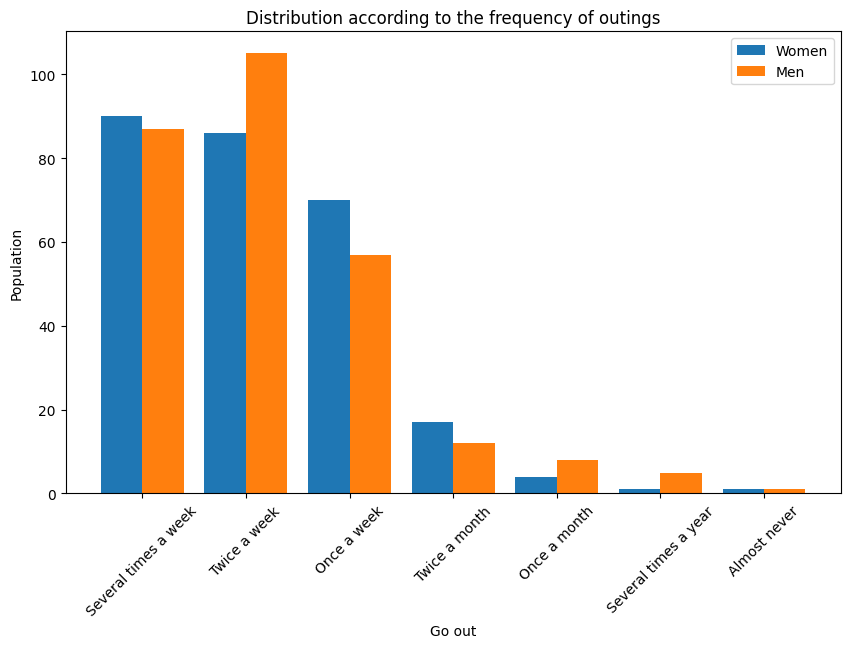

In [619]:
date_c = [
    "Several times a week",
    "Twice a week",
    "Once a week",
    "Twice a month",
    "Once a month",
    "Several times a year",
    "Almost never"
]
go_outs = df_filtered.dropna(subset=["go_out"]).groupby(["gender", "go_out"]).size().reset_index(name="count_outings").pivot_table(index="go_out", columns="gender", values="count_outings")
plt.figure(figsize=(10, 6))
plt.bar(range(len(date_c)), go_outs[0], width=0.4, label="Women")
plt.bar([i + 0.4 for i in range(len(date_c))], go_outs[1], width=0.4, label="Men")
plt.xticks([i + 0.2 for i in range(len(date_c))], date_c, rotation=45)
plt.xlabel("Go out")
plt.ylabel("Population")
plt.title("Distribution according to the frequency of outings")
plt.legend()
plt.show()

It's evident from the data that the majority of participants in this experiment exhibit outgoing traits.

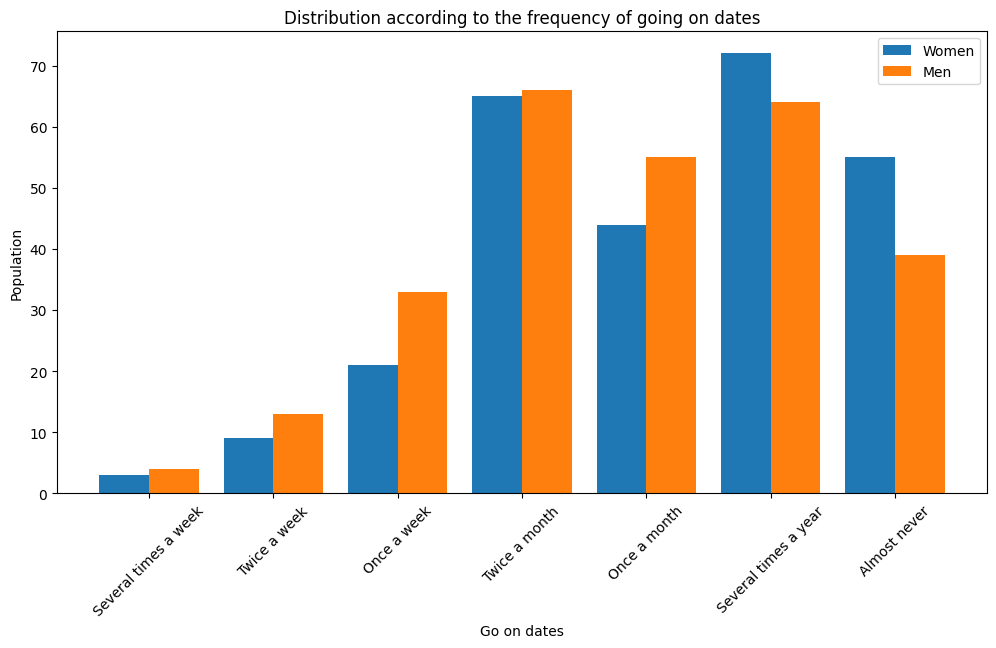

In [ ]:

date_d = [
    "Several times a week",
    "Twice a week",
    "Once a week",
    "Twice a month",
    "Once a month",
    "Several times a year",
    "Almost never"
]
dates = df_filtered.dropna(subset=["date"]).groupby(["gender", "date"]).size().reset_index(name="count_dates").pivot_table(index="date", columns="gender", values="count_dates")
plt.figure(figsize=(12, 6))
plt.bar(range(len(date_d)), dates[0], width=0.4, label="Women")
plt.bar([i + 0.4 for i in range(len(date_d))], dates[1], width=0.4, label="Men")
plt.xticks([i + 0.2 for i in range(len(date_d))], date_d, rotation=45)
plt.xlabel("Go on dates")
plt.ylabel("Population")
plt.title("Distribution according to the frequency of going on dates")
plt.legend()
plt.show()

Observing the two histograms above, it becomes evident that individuals who exhibit higher sociability, or at least engage in frequent social outings, are also more inclined to go on dates more frequently.

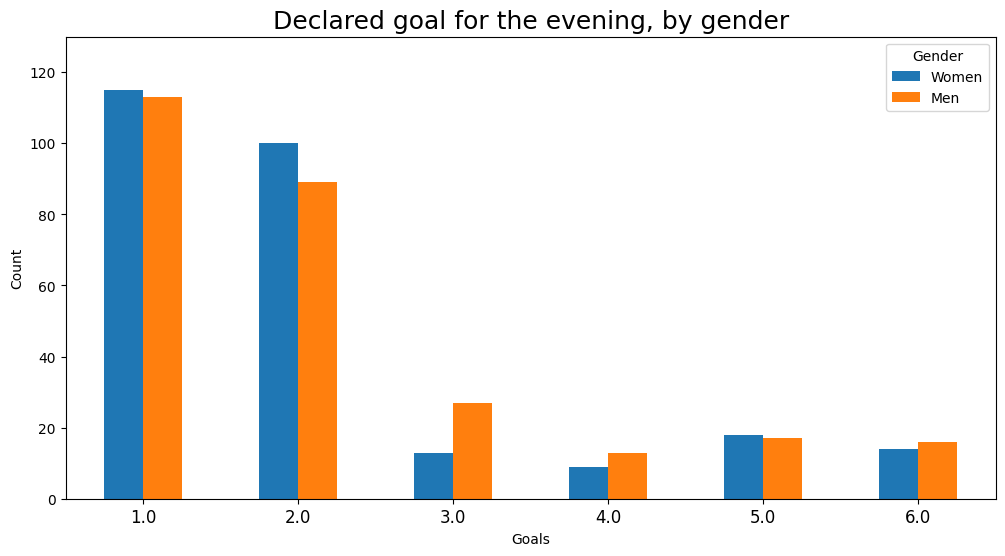

In [ ]:
goal_gender_data = df_filtered[['gender', 'goal']].groupby(['goal', 'gender']).size().unstack()
goal_gender_plots = goal_gender_data.plot(kind='bar', figsize=(12, 6), ylim=(0, 130))
goal_gender_plots.set_xticklabels(goal_gender_plots.get_xticklabels(), fontsize=12, rotation='horizontal')
goal_gender_plots.set_title('Declared goal for the evening, by gender', fontsize=18)
plt.legend(['Women', 'Men'], title='Gender')
plt.xlabel("Goals")
plt.ylabel('Count')
plt.show()

A noticeable distance appears in their motivations for attending. 

While most participants mentioned they attend primarily to socialize and meet new people, it's worth noting that men are more inclined to seek a potential date compared to women.

* Race répartition

In [ ]:
df['race'] = df_filtered.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 6: 'Other'}).fillna(df.race)
df['race_o'] = df_filtered.race_o.map({1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 6: 'Other'}).fillna(df.race_o)
race_counts = df_filtered['race'].dropna().value_counts()
fig4 = go.Figure(data=[go.Pie(labels=race_counts.index.map({1: 'Black', 2: 'White', 3: 'Hispanic', 4: 'Asian', 6: 'Other'}), values=race_counts.values)])
fig4.update_layout(title='Race distribution', title_x=0.5)
fig4.show()

The pie chart highlights a strong presence of the Caucasien and Asians categories in the racial distribution. This strong presence could be due to the location where the event took place rather than a generality, or it could either be a cultural thing.

<Figure size 1200x600 with 0 Axes>

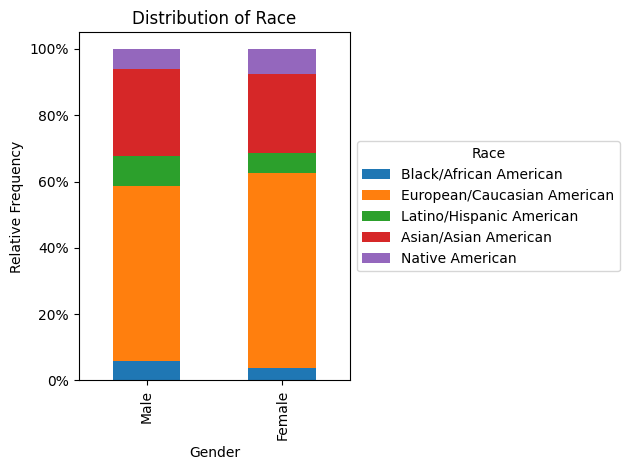

In [ ]:
race_label = ["Black/African American", "European/Caucasian American", 
              "Latino/Hispanic American", "Asian/Asian American", 
              "Native American", "Other"]
data_race = df_filtered.dropna(subset=['race'])
data_race = data_race[['iid', 'gender', 'race']]
data_race = data_race.drop_duplicates(subset='iid')
plt.figure(figsize=(12, 6))
data_race.groupby(['gender', 'race']).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Distribution of Race')
plt.xlabel('Gender')
plt.ylabel('Relative Frequency')
plt.xticks([0, 1], ['Male', 'Female'])
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.legend(title='Race', labels=race_label, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


The race distribution of the subjects seems to be quite similar between the males and the females, this makes sense if we assume that the meetings during the event are heterosexual encounters.

## 3- Analyse 🧪

Let's now move on to the analysis stage to try to understand if certain behavioral traits stand out more than others.

* Are they concerned about age ?

To understand if age had an impact during the event, we will see if the difference between two partners who agreed to a second date changes or not.

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\2367478407.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



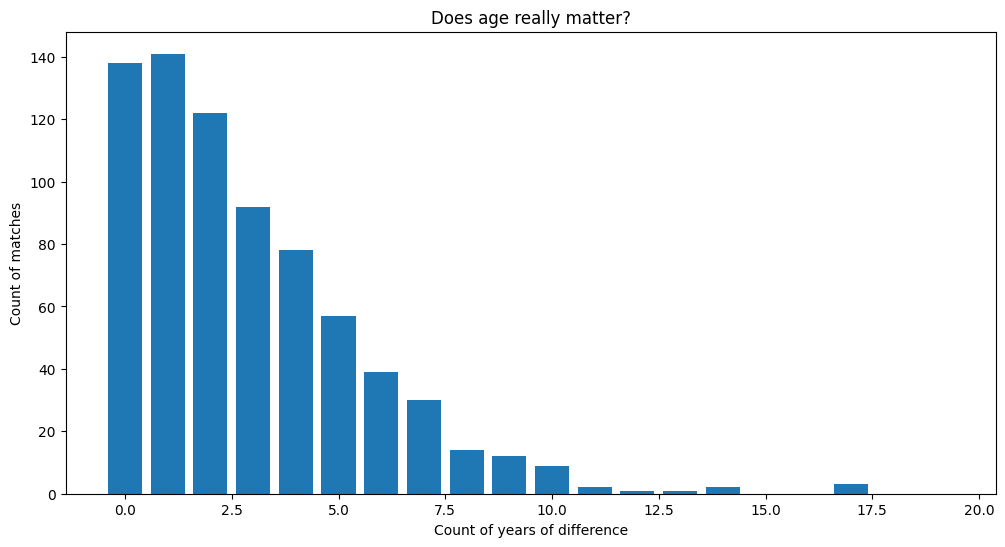

In [ ]:
age_partner_relationship = df.groupby(['age', 'age_o']).agg({'match': ['count', 'sum']}).reset_index()
age_partner_relationship.columns = ['age', 'age_o', 'n.people', 'n.matches']
age_partner_relationship = age_partner_relationship.dropna(subset=['age', 'age_o'])
age_gap = age_partner_relationship.loc[age_partner_relationship['age'] - age_partner_relationship['age_o'] >= 0]
age_gap['n.years'] = age_gap['age'] - age_gap['age_o']
age_gap = age_gap.groupby('n.years')['n.matches'].sum().reset_index()
age_gap = age_gap.loc[age_gap['n.years'] < 20]
plt.figure(figsize=(12, 6))
plt.bar(age_gap['n.years'], age_gap['n.matches'], width=0.8)
plt.xlabel("Count of years of difference")
plt.ylabel("Count of matches")
plt.title("Does age really matter?")
plt.show()

It is clear that age difference plays a role in matches; it is evident that the greater the age difference, the fewer matches we obtain

* Are they concerned about race?

During the exploration phase, it was observed that the group on which the experiment was conducted, leading to the collection of this data, consists of over 50% Caucasians and 25% Asians. We will attempt to see if race can play a role in matches.


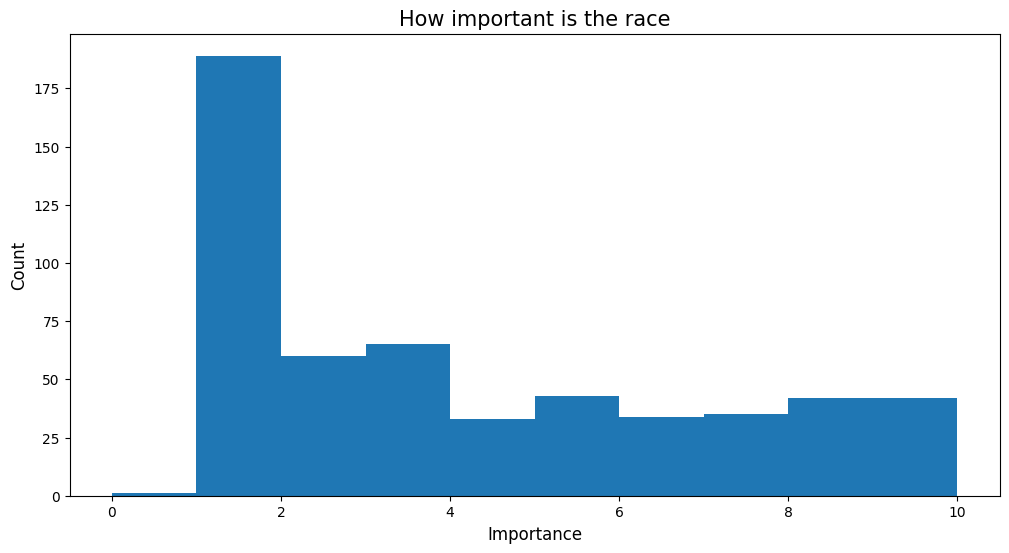

In [ ]:
race_imp_plot = df_filtered['imprace'].hist(bins=10, figsize=(12,6))
race_imp_plot.set_title('How important is the race', fontsize=15)
race_imp_plot.set_xlabel('Importance',fontsize=12)
race_imp_plot.set_ylabel('Count', fontsize=12)
race_imp_plot.grid(False)

At first glance, the tested group of individuals stated that race is not very important in a potential partner. Let's see how each gender responds to the question.

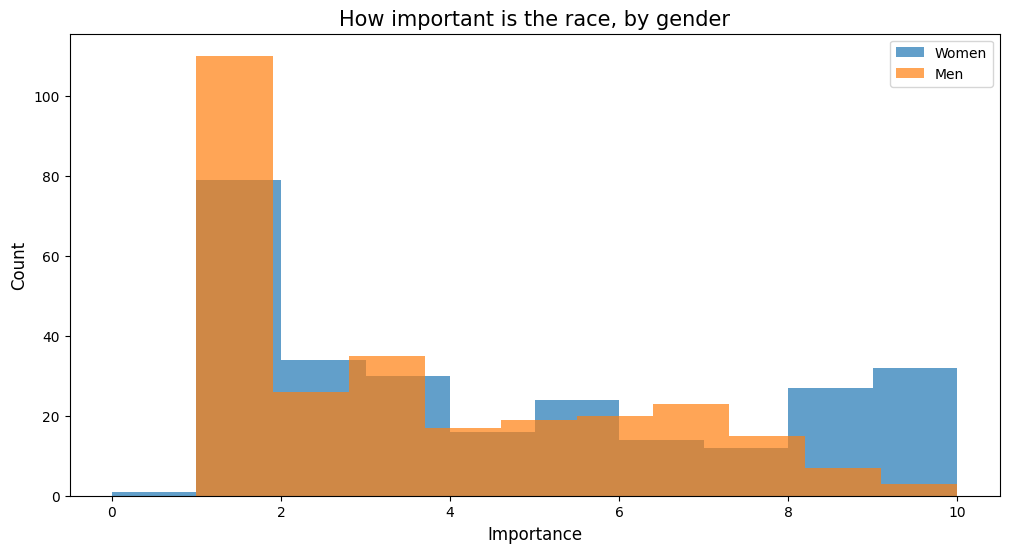

In [ ]:
gender_imp_data = df_filtered.groupby('gender')['imprace']
fig5, gender_imp_plot = plt.subplots(figsize=(12, 6))
for gender, data in gender_imp_data:
    if gender == 0:
        gender_label = 'Women'
    else:
        gender_label = 'Men'
    gender_imp_plot.hist(data, alpha=0.7, bins=10, label=gender_label)
gender_imp_plot.set_xlabel('Importance', fontsize=12)
gender_imp_plot.set_ylabel('Count', fontsize=12)
plt.title('How important is the race, by gender', fontsize=15)
plt.legend()
plt.show()

We observe a different perspective based on gender. Men seem to pay little attention to the partner's race, whereas a visible portion of women consider it significantly important. Females declare to care about race more than males.

Let's delve deeper into the analysis to understand the perspectives of each race regarding the importance of race in their partner.

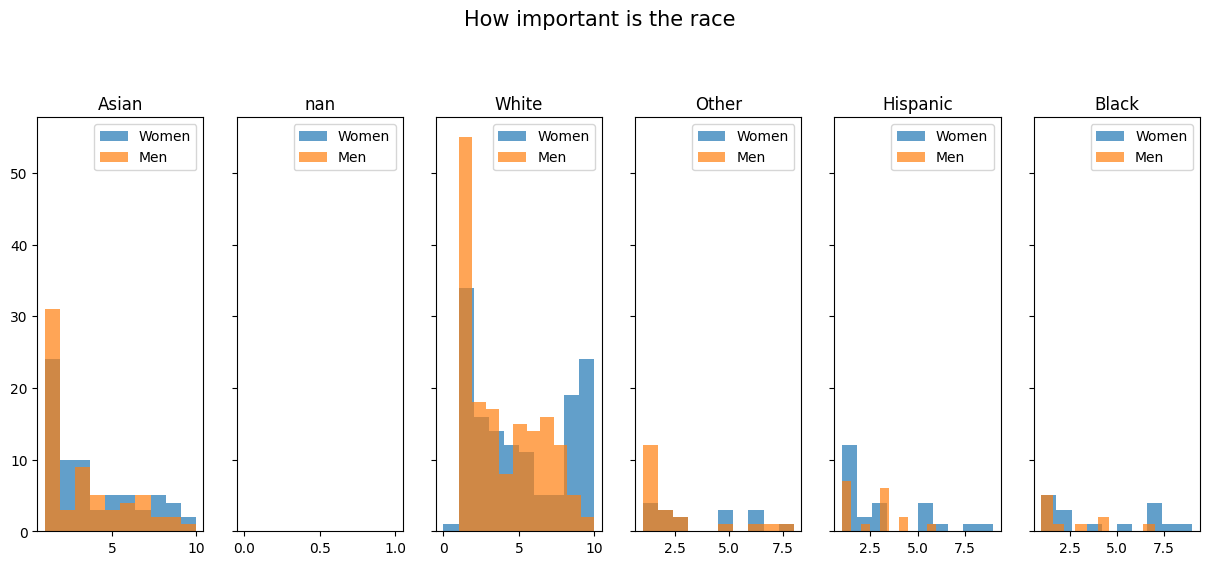

In [ ]:
fig6, axes = plt.subplots(1, len(df_filtered['race'].unique()), figsize=(15, 6), sharey=True)

for i, race in enumerate(df['race'].unique()):
    race_imp_gender_plot = axes[i]
    data_race = df[df['race'] == race]
    for gender in df['gender'].unique():
        data_gender = data_race[data_race['gender'] == gender]
        race_imp_gender_plot.hist(data_gender['imprace'], alpha=0.7, bins=10, label='Men' if gender == 1 else 'Women')
    race_imp_gender_plot.set_title(race)
    race_imp_gender_plot.legend()

fig6.suptitle('How important is the race', fontsize=15)
plt.subplots_adjust(top=0.8)
plt.show()


As highlighted in the introduction of this section, a substantial proportion of the analyzed sample comprises Caucasians, representing over 50%. Moreover, from the examination of the gender graph, it becomes apparent that Caucasian women place significance on the race of their partners.
Additionally, upon closer scrutiny, it becomes evident that within the Black community, there exists a discrepancy in the importance attributed to race between genders. Specifically, Black men tend to assign less importance to race compared to Black women. Same for Asians.

In [ ]:
display(df[['race', 'imprace','gender']].groupby(['gender','race']).agg(['mean', 'median', 'min', 'max', 'count']))

imprace                        
                     mean median  min   max count
gender race                                      
0      Asian     3.633803    3.0  1.0  10.0    71
       Black     4.062500    3.0  1.0   9.0    16
       Hispanic  2.840000    2.0  1.0   9.0    25
       Other     3.562500    3.0  1.0   8.0    16
       White     4.652482    4.0  0.0  10.0   141
1      Asian     3.107692    2.0  1.0  10.0    65
       Black     2.500000    1.5  1.0   7.0    10
       Hispanic  2.411765    3.0  1.0   6.0    17
       Other     2.380952    1.0  1.0   8.0    21
       White     3.740741    3.0  1.0  10.0   162

That Caucasian women are more inclined to prefer a partner of the same race.

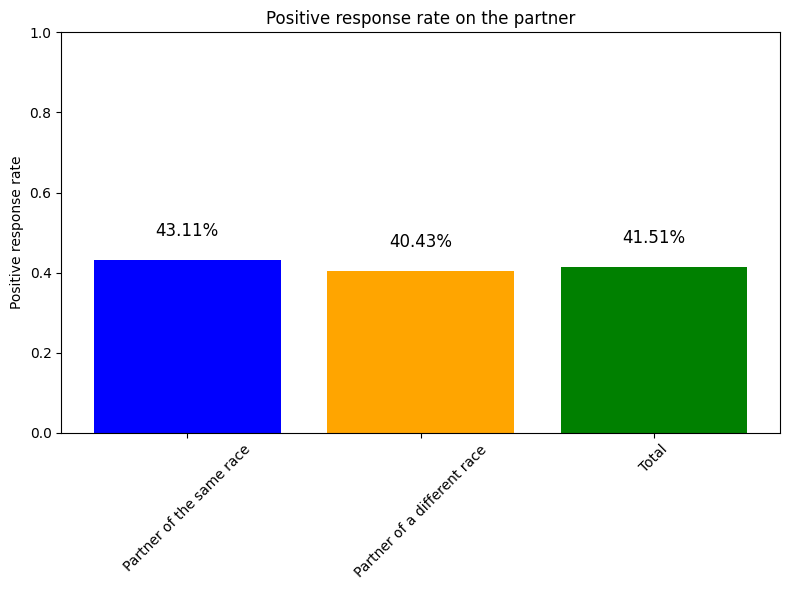

In [ ]:

partner_decision_stats = df[['iid', 'dec', 'samerace']].groupby(['iid', 'samerace']).sum().unstack().fillna(0)
partner_decision_stats.columns = partner_decision_stats.columns.droplevel()
partner_decision_stats = partner_decision_stats.rename(columns={0: 'dec_diff', 1: 'dec_same'})
partner_encounters = df[['iid', 'wave', 'samerace']].groupby(['iid', 'samerace']).count().unstack().fillna(0)
partner_encounters.columns = partner_encounters.columns.droplevel()
partner_encounters = partner_encounters.rename(columns={0: 'dates_diff', 1: 'dates_same'})

partner_stats = pd.merge(partner_decision_stats, partner_encounters, left_index=True, right_index=True)
partner_stats = partner_stats.reset_index()

df = pd.merge(df, partner_stats, on='iid')
total_positive_rate = (df['dec_diff'].sum() + df['dec_same'].sum()) / (df['dates_diff'].sum() + df['dates_same'].sum())
same_race_positive_rate = df['dec_same'].sum() / df['dates_same'].sum()
diff_race_positive_rate = df['dec_diff'].sum() / df['dates_diff'].sum()
categories = ['Partner of the same race', 'Partner of a different race', 'Total']
positive_rates = [same_race_positive_rate, diff_race_positive_rate, total_positive_rate]

plt.figure(figsize=(8, 6))
plt.bar(categories, positive_rates, color=['blue', 'orange', 'green'])
plt.title('Positive response rate on the partner')
plt.ylabel('Positive response rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, rate in enumerate(positive_rates):
    plt.text(i, rate + 0.05, f'{rate:.2%}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\3137822155.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



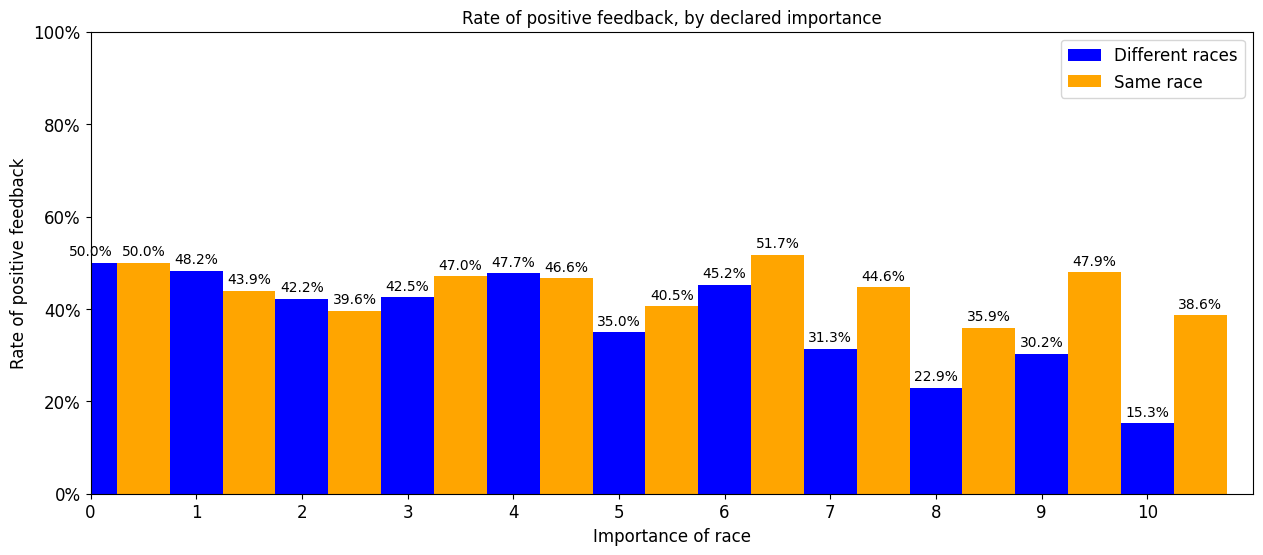

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df[df.samerace == 0][['imprace', 'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax, legend=False,
                                                                                   title='Rate of positive feedback, by declared importance', ylim=(0, 1),
                                                                                   color='blue', position=0.5)
df[df.samerace == 1][['imprace', 'dec']].groupby('imprace').mean().unstack().plot(kind='bar', ax=ax, legend=False,
                                                                                   ylim=(0, 1), color='orange', position=-0.5)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals], fontsize=12)
ax.set_xticklabels([str(i) for i in range(11)], fontsize=12, rotation='horizontal')
ax.set_xlabel('Importance of race', fontsize=12)
ax.set_ylabel('Rate of positive feedback', fontsize=12)
ax.legend(['Different races', 'Same race'], fontsize=12)
for rect1, rect2 in zip(ax.patches[:11], ax.patches[11:]):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.annotate(f'{height1:.1%}', xy=(rect1.get_x() + rect1.get_width() / 2, height1), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
    ax.annotate(f'{height2:.1%}', xy=(rect2.get_x() + rect2.get_width() / 2, height2), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
plt.show()


We note that regardless of gender, race plays a role, even if it is slight.

We observe that sharing the same race has a positive impact regardless of whether individuals declare it as important or not. Furthermore, this effect is notably pronounced when race is deemed a highly significant factor.

* Do they care about religion ?

If race may have had a possible impact, it is reasonable to wonder if religion can also play a role.

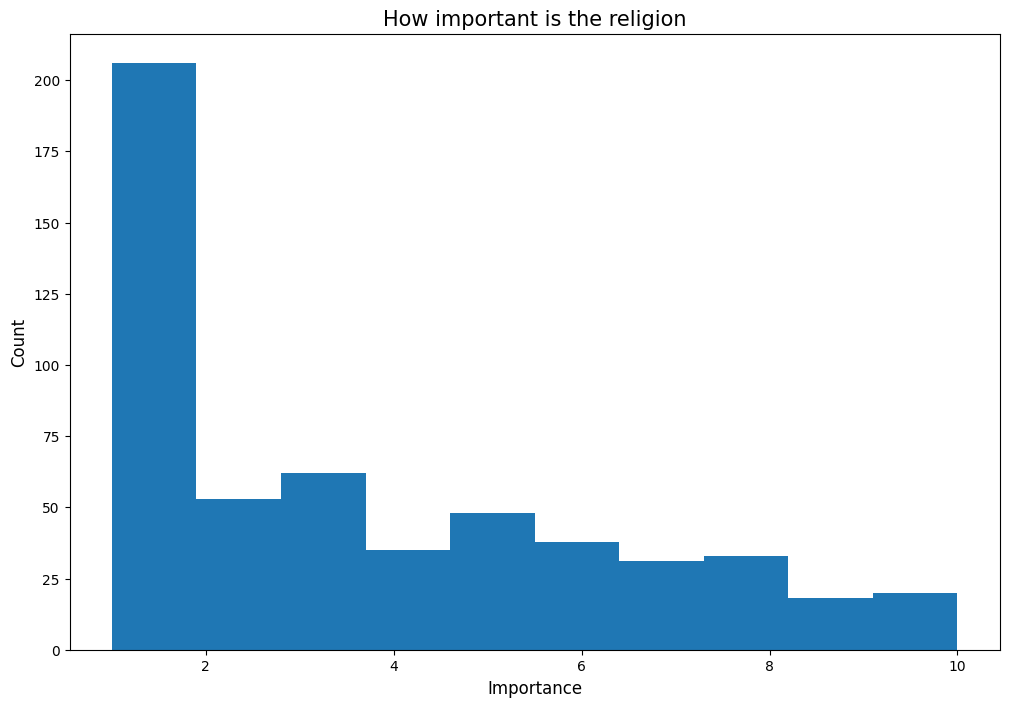

In [ ]:
religion_imp_plots = df_filtered['imprelig'].hist(bins=10, figsize=(12, 8))
religion_imp_plots.set_title('How important is the religion', fontsize=15)
religion_imp_plots.set_xlabel('Importance', fontsize=12)
religion_imp_plots.set_ylabel('Count', fontsize=12)
religion_imp_plots.grid(False)

plt.show()


At first glance, here too religion appears to not be important, but as seen previously with race, words and actions may not be consistent with reality.

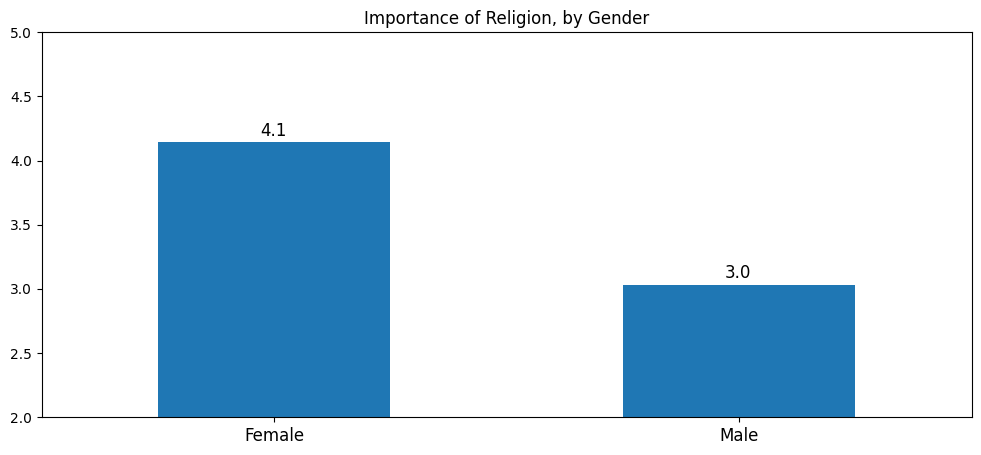

In [ ]:
mean_imprelig_gender = df_filtered.groupby('gender')['imprelig'].mean()
ax = mean_imprelig_gender.plot(kind='bar', figsize=(12, 5), legend=False, title='Importance of Religion, by Gender', ylim=(2, 5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('', fontsize=1)
for i in ax.patches:
    ax.text(i.get_x() + 0.22, i.get_height() + 0.05, str(round(i.get_height(), 1)), fontsize=12)

plt.show()

Again, female participants are declaring higher values

In [ ]:

display(df[['race', 'imprelig','gender']].groupby(['gender', 'race']).agg(['mean', 'median','max','min']))

imprelig                  
                     mean median   max  min
gender race                                
0      Asian     3.549296    3.0  10.0  1.0
       Black     3.875000    2.5  10.0  1.0
       Hispanic  3.360000    3.0  10.0  1.0
       Other     4.687500    4.5  10.0  1.0
       White     4.553191    4.0  10.0  1.0
1      Asian     2.476923    1.0   8.0  1.0
       Black     1.800000    1.0   4.0  1.0
       Hispanic  3.117647    3.0   9.0  1.0
       Other     2.476190    1.0   9.0  1.0
       White     3.395062    2.0  10.0  1.0

Thus, overall, women of white (and 'other') race report placing more importance on race and religion than any other segment of the population. It's hard not to notice how these gender differences vary across races. We observe once again a significant gender gap among black participants and among participants of 'other' races. Finally, it appears that Hispanic individuals are fairly united in prioritizing religion (on average), regardless of their gender

* What are the least desirable attributes in a male partner? Does this differ for female partners?

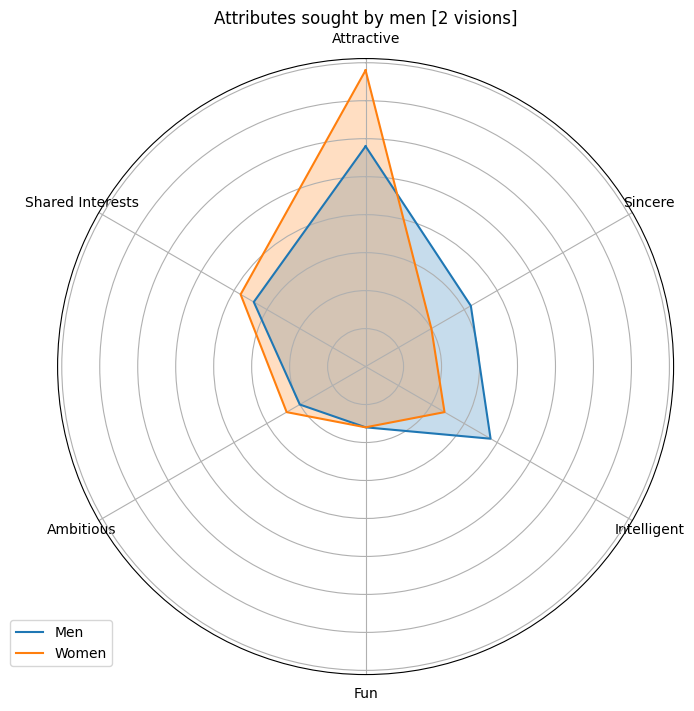

In [ ]:
speed_dating_filtered  = df_filtered[(df_filtered['wave'] > 9) | (df_filtered['wave'] < 6)]
data_features = speed_dating_filtered.copy()
data_features = data_features[['iid', 'gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'amb1_1', 'shar1_1','fun1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'amb2_1', 'shar2_1','fun2_1']]
data_features = data_features.drop_duplicates(subset='iid', keep='first')

# Men
men = data_features[data_features['gender'] == 1]
# Women
women = data_features[data_features['gender'] == 0]
labels=np.array(["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Shared Interests"])

# [// what you look for in the opposite sex  //]
#Men attributes
attrM1_1_mean =round(men["attr1_1"].mean())
sincM1_1_mean =round(men["sinc1_1"].mean())
intelM1_1_mean =round(men["intel1_1"].mean())
ambM1_1_mean =round(men["amb1_1"].mean())
sharM1_1_mean =round(men["shar1_1"].mean())
funM1_1_mean =round(men["fun1_1"].mean())

#Women attributes
attrW1_1_mean =round(women["attr2_1"].mean())
sincW1_1_mean =round(women["sinc2_1"].mean())
intelW1_1_mean =round(women["intel2_1"].mean())
ambW1_1_mean =round(women["amb2_1"].mean())
sharW1_1_mean =round(women["shar2_1"].mean())
funW1_1_mean =round(women["fun2_1"].mean())

men_means=np.array([attrM1_1_mean, sincM1_1_mean, intelM1_1_mean, ambM1_1_mean, sharM1_1_mean, funM1_1_mean])
women_means=np.array([attrW1_1_mean, sincW1_1_mean, intelW1_1_mean, ambW1_1_mean, sharW1_1_mean, funW1_1_mean])


num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
men_means = np.concatenate((men_means, [men_means[0]]))
women_means = np.concatenate((women_means, [women_means[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
for label, data in zip(['Men', 'Women'], [men_means,women_means]):
    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # On évite la répétition
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Attributes sought by men [2 visions]")
plt.show()

This dual perspective representation sheds light on the attributes that men consider important in their female partners, as well as what women believe are the important attributes that men seek in them.
Two distinct viewpoints emerge. Women perceive that men place a high emphasis on physical attractiveness, whereas in the male perspective representation, although physical appearance is indeed a factor, it holds less significance than women believe. Intelligence and sincerity are also seen to play a significant role from the male perspective.

Now let's do the same thing for women:

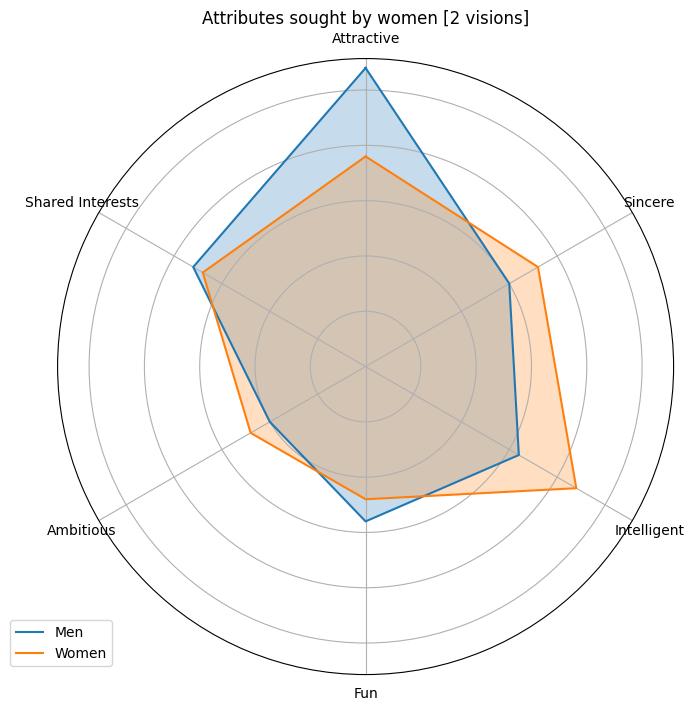

In [ ]:
speed_dating_filtered  = df_filtered[(df_filtered['wave'] > 9) | (df_filtered['wave'] < 6)]
data_features = speed_dating_filtered.copy()
data_features = data_features[['iid', 'gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'amb1_1', 'shar1_1','fun1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'amb2_1', 'shar2_1','fun2_1']]
data_features = data_features.drop_duplicates(subset='iid', keep='first')
men = data_features[data_features['gender'] == 1]
women = data_features[data_features['gender'] == 0]
labels=np.array(["Attractive", "Sincere", "Intelligent", "Fun", "Ambitious", "Shared Interests"])

#Men attributes
attrM1_1_mean =round(men["attr2_1"].mean())
sincM1_1_mean =round(men["sinc2_1"].mean())
intelM1_1_mean =round(men["intel2_1"].mean())
ambM1_1_mean =round(men["amb2_1"].mean())
sharM1_1_mean =round(men["shar2_1"].mean())
funM1_1_mean =round(men["fun2_1"].mean())

#Women attributes
attrW1_1_mean =round(women["attr1_1"].mean())
sincW1_1_mean =round(women["sinc1_1"].mean())
intelW1_1_mean =round(women["intel1_1"].mean())
ambW1_1_mean =round(women["amb1_1"].mean())
sharW1_1_mean =round(women["shar1_1"].mean())
funW1_1_mean =round(women["fun1_1"].mean())

men_means=np.array([attrM1_1_mean, sincM1_1_mean, intelM1_1_mean, ambM1_1_mean, sharM1_1_mean, funM1_1_mean])
women_means=np.array([attrW1_1_mean, sincW1_1_mean, intelW1_1_mean, ambW1_1_mean, sharW1_1_mean, funW1_1_mean])
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
men_means = np.concatenate((men_means, [men_means[0]]))
women_means = np.concatenate((women_means, [women_means[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
for label, data in zip(['Men', 'Women'], [men_means,women_means]):
    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1]) 
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Attributes sought by women [2 visions]")
plt.show()

This dual perspective portrayal underscores the qualities that women deem significant in their male partners, alongside what men perceive as crucial attributes sought by women in them.
Women seem to value traits like sincerity and intelligence more than anticipated by men, placing less emphasis on physical attractiveness. Conversely, men expected women to prioritize physical attractiveness, mirroring women's assumptions about men.

A similarity is noted in both cases where both men and women overestimate the importance of the physical attribute in their partner.

In [620]:
# Convert relevant columns to numeric data types
numeric_columns = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
speed_dating_filtered[numeric_columns] = speed_dating_filtered[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Remove NaN values
speed_dating_filtered.dropna(subset=numeric_columns, inplace=True)

# Group by gender and calculate mean
atributes_gender = speed_dating_filtered.groupby('gender')[numeric_columns].mean()

# Define column names
cols = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
atributes_gender.columns = cols

# Create Plotly Bar traces
data = [
    go.Bar(
        y=atributes_gender.loc[1].values,
        x=cols,
        name='Men',
        marker=dict(color='lightblue')
    ),
    go.Bar(
        y=atributes_gender.loc[0].values,
        x=cols,
        name='Women',
        marker=dict(color='orange')
    )
]

# Define layout
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    title_x = 0.5,
    font=dict(size=16),
    legend=dict(font=dict(size=16))
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')


C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\1293461635.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\1293461635.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We notice that the least attractive attributes for men are ambition in women. However, among women, they are rather balanced in their choices, but they also do not emphasize ambition and shared interests.

* How important do people think attractiveness is in potential mate selection vs. its real impact?

In the previous section, we saw that physical appearance played a significant role in the minds of both sexes. However, one may wonder if physical appearance is as important as the candidates believe.

Before Date :

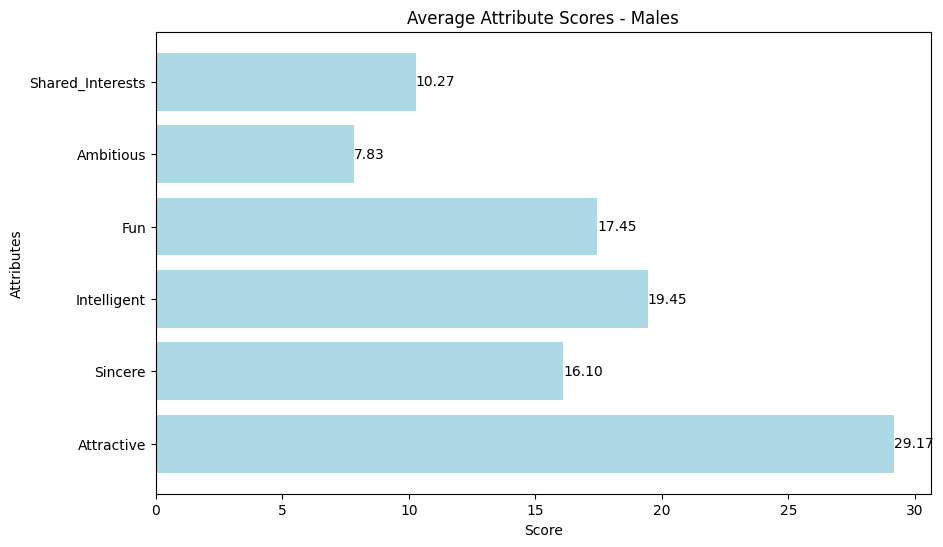

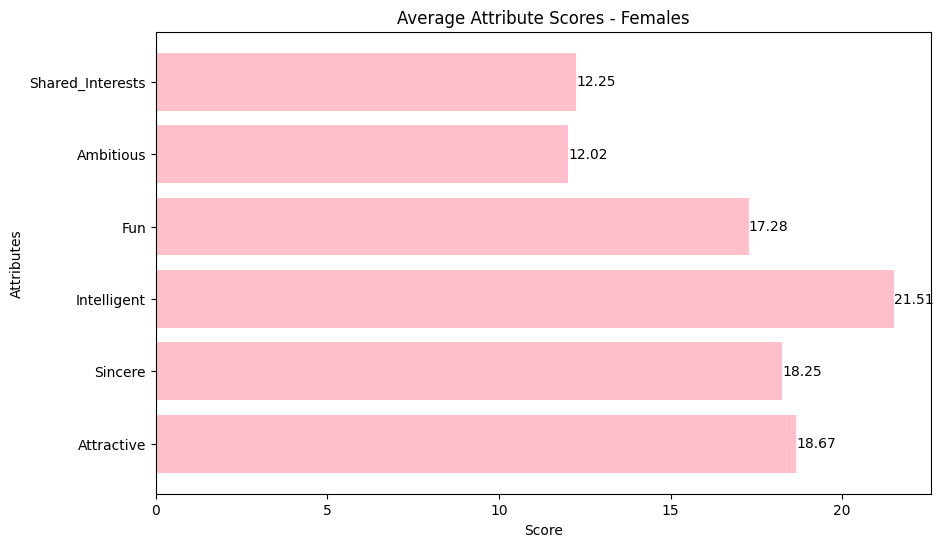

In [ ]:

average_attributes_by_gender = speed_dating_filtered.dropna(subset=['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']) \
    .groupby('gender') \
    .agg({'attr1_1': 'mean', 'sinc1_1': 'mean', 'intel1_1': 'mean', 'fun1_1': 'mean', 'amb1_1': 'mean', 'shar1_1': 'mean'}) \
    .rename(columns={'attr1_1': 'Avg_Attractive', 'sinc1_1': 'Avg_Sincere', 'intel1_1': 'Avg_Intelligent', 
                     'fun1_1': 'Avg_Fun', 'amb1_1': 'Avg_Ambitious', 'shar1_1': 'Avg_Shared_Interests'}) \
    .reset_index()
def reshape_data(df, attribute):
    df_reshaped = df[['gender', attribute]].rename(columns={attribute: 'score'})
    df_reshaped['Attribute_Type'] = attribute.replace('Avg_', '')
    return df_reshaped

attributes = ['Avg_Attractive', 'Avg_Sincere', 'Avg_Intelligent', 'Avg_Fun', 'Avg_Ambitious', 'Avg_Shared_Interests']
summary_data = pd.concat([reshape_data(average_attributes_by_gender, attr) for attr in attributes])

# Males
plt.figure(figsize=(10, 6))
male_data = summary_data[summary_data['gender'] == 1]
for i, (score, attribute) in enumerate(zip(male_data['score'], male_data['Attribute_Type'])):
    plt.barh(attribute, score, color='lightblue')
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Males')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()

# Females
plt.figure(figsize=(10, 6))
female_data = summary_data[summary_data['gender'] == 0]
for i, (score, attribute) in enumerate(zip(female_data['score'], female_data['Attribute_Type'])):
    plt.barh(attribute, score, color='pink')
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Females')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()


After date :

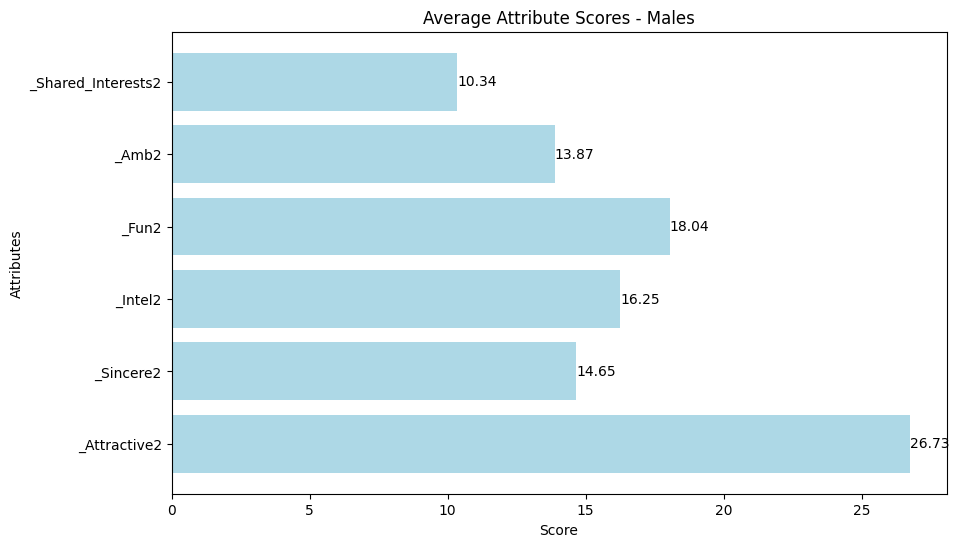

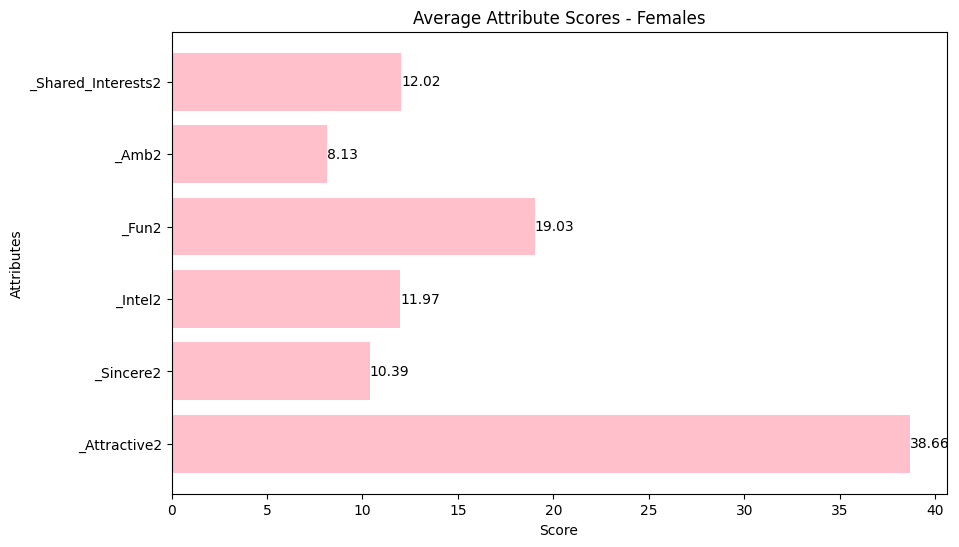

In [ ]:
average_attributes_by_gender = speed_dating_filtered.dropna(subset=['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']) \
    .groupby('gender') \
    .agg({'attr2_1': 'mean', 'sinc2_1': 'mean', 'intel2_1': 'mean', 'fun2_1': 'mean', 'amb2_1': 'mean', 'shar2_1': 'mean'}) \
    .rename(columns={'attr2_1': 'Avg_Attractive2', 'sinc2_1': 'Avg_Sincere2', 'intel2_1': 'Avg_Intel2', 
                     'fun2_1': 'Avg_Fun2', 'amb2_1': 'Avg_Amb2', 'shar2_1': 'Avg_Shared_Interests2'}) \
    .reset_index()
def reshape_data(df, attribute):
    df_reshaped = df[['gender', attribute]].rename(columns={attribute: 'score'})
    df_reshaped['Attribute_Type'] = attribute.replace('Avg', '')
    return df_reshaped

attributes = ['Avg_Attractive2', 'Avg_Sincere2', 'Avg_Intel2', 'Avg_Fun2', 'Avg_Amb2', 'Avg_Shared_Interests2']
summary_data = pd.concat([reshape_data(average_attributes_by_gender, attr) for attr in attributes])

# Males
plt.figure(figsize=(10, 6))
male_data = summary_data[summary_data['gender'] == 1]
plt.barh(male_data['Attribute_Type'], male_data['score'], color='lightblue')
for i, (score, attribute) in enumerate(zip(male_data['score'], male_data['Attribute_Type'])):
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Males')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()

# Females
plt.figure(figsize=(10, 6))
female_data = summary_data[summary_data['gender'] == 0]
plt.barh(female_data['Attribute_Type'], female_data['score'], color='pink')
for i, (score, attribute) in enumerate(zip(female_data['score'], female_data['Attribute_Type'])):
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Females')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()


Sometime after the end of the date:

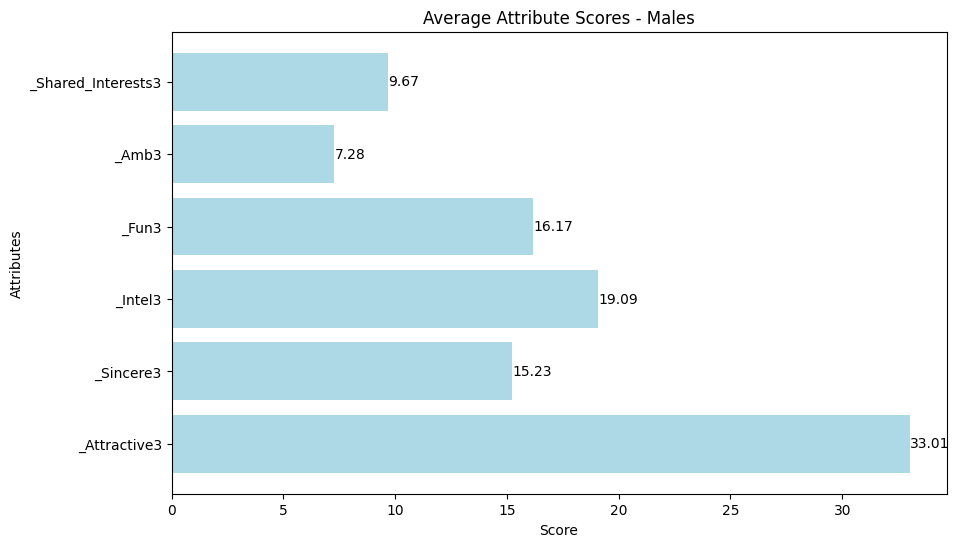

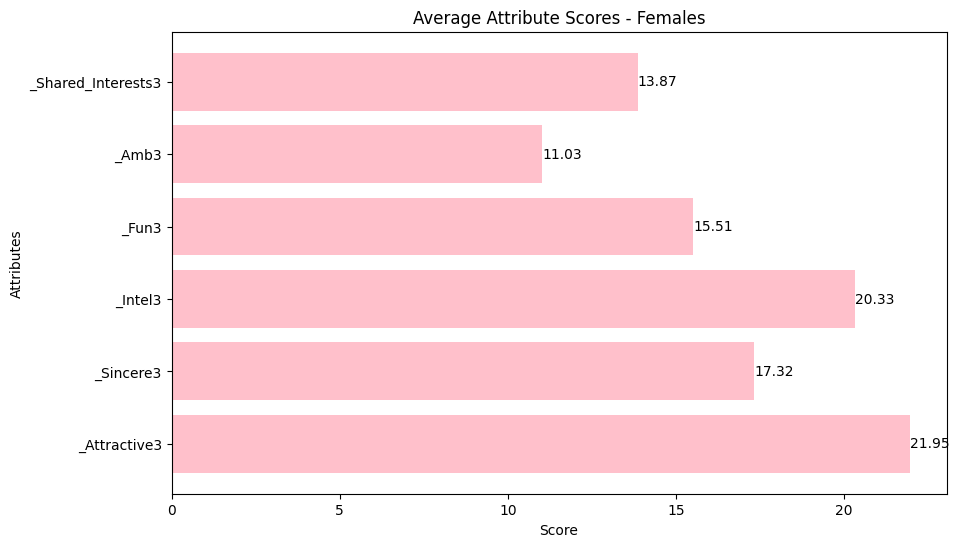

In [ ]:
average_attributes_by_gender = speed_dating_filtered.dropna(subset=['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3']) \
    .groupby('gender') \
    .agg({'attr1_3': 'mean', 'sinc1_3': 'mean', 'intel1_3': 'mean', 'fun1_3': 'mean', 'amb1_3': 'mean', 'shar1_3': 'mean'}) \
    .rename(columns={'attr1_3': 'Avg_Attractive3', 'sinc1_3': 'Avg_Sincere3', 'intel1_3': 'Avg_Intel3', 
                     'fun1_3': 'Avg_Fun3', 'amb1_3': 'Avg_Amb3', 'shar1_3': 'Avg_Shared_Interests3'}) \
    .reset_index()
def reshape_data(df, attribute):
    df_reshaped = df[['gender', attribute]].rename(columns={attribute: 'score'})
    df_reshaped['Attribute_Type'] = attribute.replace('Avg', '')
    return df_reshaped

attributes = ['Avg_Attractive3', 'Avg_Sincere3', 'Avg_Intel3', 'Avg_Fun3', 'Avg_Amb3', 'Avg_Shared_Interests3']
summary_data = pd.concat([reshape_data(average_attributes_by_gender, attr) for attr in attributes])

# Males
plt.figure(figsize=(10, 6))
male_data = summary_data[summary_data['gender'] == 1]
plt.barh(male_data['Attribute_Type'], male_data['score'], color='lightblue')
for i, (score, attribute) in enumerate(zip(male_data['score'], male_data['Attribute_Type'])):
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Males')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()

# Females
plt.figure(figsize=(10, 6))
female_data = summary_data[summary_data['gender'] == 0]
plt.barh(female_data['Attribute_Type'], female_data['score'], color='pink')
for i, (score, attribute) in enumerate(zip(female_data['score'], female_data['Attribute_Type'])):
    plt.text(score, i, f'{score:.2f}', va='center')
plt.title('Average Attribute Scores - Females')
plt.xlabel('Score')
plt.ylabel('Attributes')
plt.show()


Throughout all three phases, men consistently prioritize physical attraction. In contrast, women initially favored intelligence, but their preferences shifted towards physical attractiveness both immediately after the event and again 4 weeks later.

* Can people accurately predict their own perceived value in the dating market?

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\3436772734.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



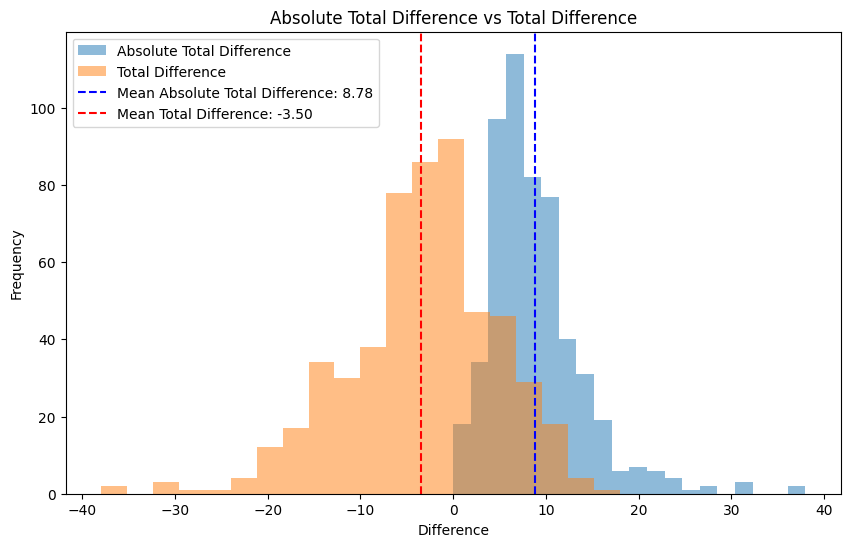

In [ ]:
participant_data = df_filtered[['iid', 'pid', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'gender', 'age', 'race']]
def impute_mean(x):
    return x.fillna(x.mean())
participant_data[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']] = participant_data.groupby('iid')[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o','attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']].transform(impute_mean)
participant_data = participant_data.groupby(['iid', 'race', 'gender', 'age']).mean().reset_index()
participant_data['attr_diff_abs'] = abs(participant_data['attr_o'] - participant_data['attr3_1'])
participant_data['sinc_diff_abs'] = abs(participant_data['sinc_o'] - participant_data['sinc3_1'])
participant_data['fun_diff_abs'] = abs(participant_data['fun_o'] - participant_data['fun3_1'])
participant_data['amb_diff_abs'] = abs(participant_data['amb_o'] - participant_data['amb3_1'])
participant_data['intel_diff_abs'] = abs(participant_data['intel_o'] - participant_data['intel3_1'])
participant_data['attr_diff'] = participant_data['attr_o'] - participant_data['attr3_1']
participant_data['sinc_diff'] = participant_data['sinc_o'] - participant_data['sinc3_1']
participant_data['fun_diff'] = participant_data['fun_o'] - participant_data['fun3_1']
participant_data['amb_diff'] = participant_data['amb_o'] - participant_data['amb3_1']
participant_data['intel_diff'] = participant_data['intel_o'] - participant_data['intel3_1']

ind_diff_abs = pd.melt(participant_data, id_vars=['iid', 'gender', 'age', 'race'], 
                   value_vars=['attr_diff_abs', 'sinc_diff_abs', 'fun_diff_abs', 'amb_diff_abs', 'intel_diff_abs'],
                   var_name='Attribute_absolute', value_name='Attribute_value_absolute')
ind_diff = pd.melt(participant_data, id_vars=['iid', 'gender', 'age', 'race'], 
                   value_vars=['attr_diff', 'sinc_diff', 'fun_diff', 'amb_diff', 'intel_diff'],
                   var_name='Attribute', value_name='Attribute_value')

abs_total_diff = ind_diff_abs.groupby('iid')['Attribute_value_absolute'].sum().reset_index()
total_diff = ind_diff.groupby('iid')['Attribute_value'].sum().reset_index()
abs_total_diff = abs_total_diff.merge(participant_data[['iid', 'gender', 'age', 'race']], on='iid', how='left')
total_diff = total_diff.merge(participant_data[['iid', 'gender', 'age', 'race']], on='iid', how='left')

plt.figure(figsize=(10, 6))
plt.hist(abs_total_diff['Attribute_value_absolute'], bins=20, alpha=0.5, label='Absolute Total Difference')
plt.hist(total_diff['Attribute_value'], bins=20, alpha=0.5, label='Total Difference')
mean_abs = abs_total_diff['Attribute_value_absolute'].mean()
mean_total = total_diff['Attribute_value'].mean()
plt.axvline(x=mean_abs, color='blue', linestyle='--', label=f'Mean Absolute Total Difference: {mean_abs:.2f}')
plt.axvline(x=mean_total, color='red', linestyle='--', label=f'Mean Total Difference: {mean_total:.2f}')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Absolute Total Difference vs Total Difference')
plt.legend()
plt.show()


Why do I utilize absolute values for the blue histogram and conventional values allowing negative values in the orange histogram?

The absolute value between the two values: This metric evaluates the extent to which an individual's perception or prediction of a score differs from the score actually obtained by their partner.

The 'normal' value between two values: This metric helps assess whether people tend to underestimate or overestimate themselves. By considering the sign of the difference, it's possible to determine if an individual's perception is lower or higher than their actual performance.

The blue histogram illustrates how often individuals inaccurately assess themselves and the extent of this misjudgment. On average, people's predictions of their perceived value are off by 8.7 points when considering all attributes, as indicated by the mean line.

The orange histogram demonstrates how frequently individuals underestimate or overestimate themselves across all attributes, with negative values indicating underestimation and positive values indicating overestimation. The mean line within the graph indicates that, on average, people tend to underestimate themselves.

Let's see if the scores change by gender :

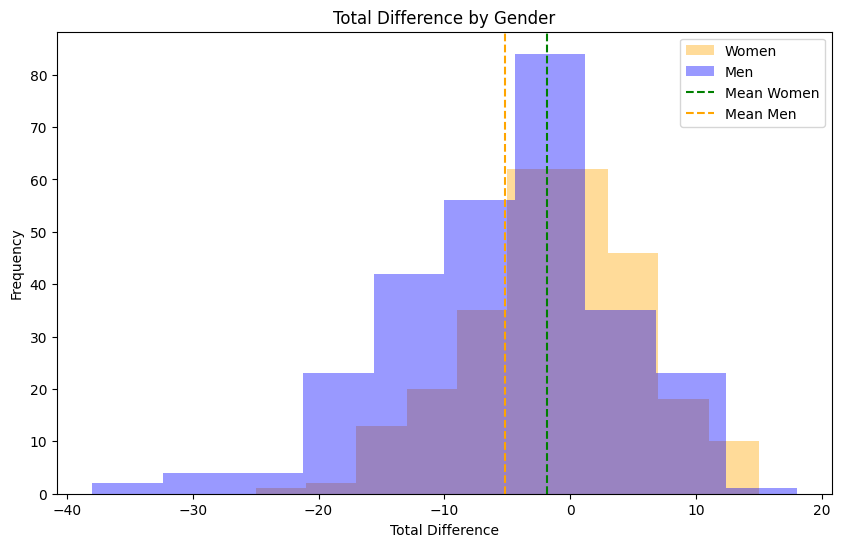

In [ ]:
totaldiff_gender = total_diff.groupby('gender')['Attribute_value'].mean().reset_index()
mean_colors = {0: 'green', 1: 'orange'}
plt.figure(figsize=(10, 6))
# Women
plt.hist(total_diff[total_diff['gender'] == 0]['Attribute_value'], color='orange', alpha=0.4, label='Women')
# Men
plt.hist(total_diff[total_diff['gender'] == 1]['Attribute_value'], color='blue', alpha=0.4, label='Men')
for index, row in totaldiff_gender.iterrows():
    plt.axvline(x=row['Attribute_value'], color=mean_colors[row['gender']], linestyle='--', label=f'Mean {"Women" if row["gender"] == 0 else "Men"}')
plt.xlabel('Total Difference')
plt.ylabel('Frequency')
plt.title('Total Difference by Gender')
plt.legend()
plt.show()

Looking at this graph, we observe that both men and women underestimate themselves, however, men do so more than women.

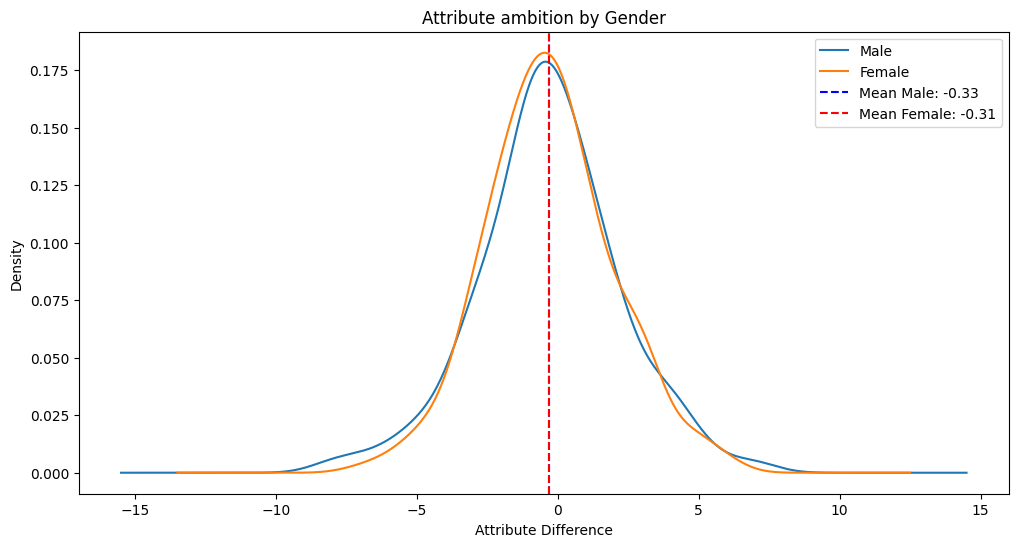

In [ ]:
male_data = participant_data.loc[participant_data['gender'] == 1]  
female_data = participant_data.loc[participant_data['gender'] == 0]  
amb_diff_male = male_data['amb_diff']
amb_diff_female = female_data['amb_diff']
mean_male = amb_diff_male.mean()
mean_female = amb_diff_female.mean()
plt.figure(figsize=(12, 6))
amb_diff_male.plot.density(label='Male')
amb_diff_female.plot.density(label='Female')
plt.axvline(x=mean_male, color='blue', linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.axvline(x=mean_female, color='red', linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.xlabel('Attribute Difference')
plt.ylabel('Density')
plt.title('Attribute ambition by Gender')
plt.legend()
plt.show()

On this representation, we can observe that both men and women underestimate themselves when asked to rate their level of ambition. However, it is noticeable that men slightly underestimate themselves more than women in this regard.

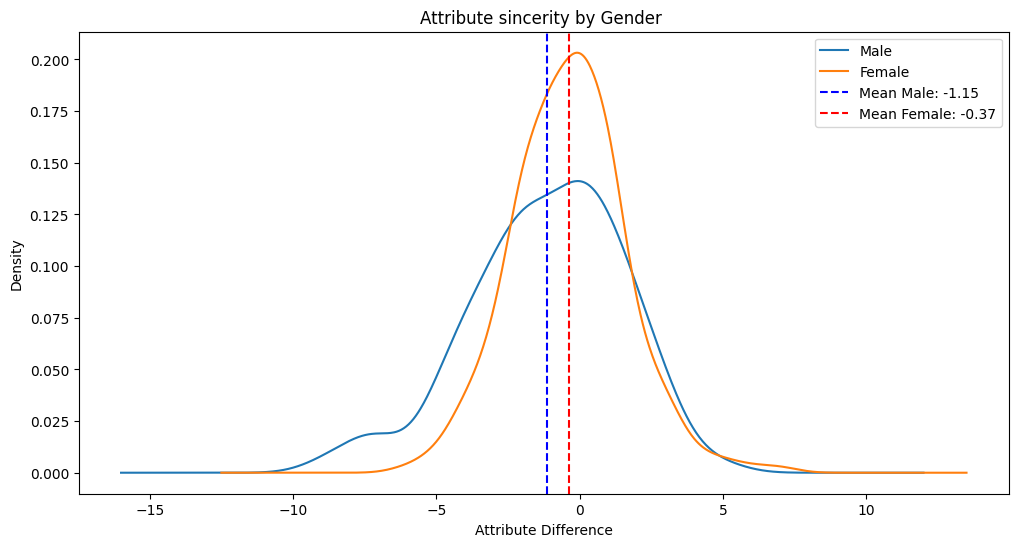

In [ ]:
male_data = participant_data.loc[participant_data['gender'] == 1]  
female_data = participant_data.loc[participant_data['gender'] == 0]  
sinc_diff_male = male_data['sinc_diff']
sinc_diff_female = female_data['sinc_diff']
mean_male = sinc_diff_male.mean()
mean_female = sinc_diff_female.mean()
plt.figure(figsize=(12, 6))
sinc_diff_male.plot.density(label='Male')
sinc_diff_female.plot.density(label='Female')
plt.axvline(x=mean_male, color='blue', linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.axvline(x=mean_female, color='red', linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.xlabel('Attribute Difference')
plt.ylabel('Density')
plt.title('Attribute sincerity by Gender ')
plt.legend()
plt.show()

Regarding sincerity, women would be more sincere than men, however, here too, both genders underestimate themselves.

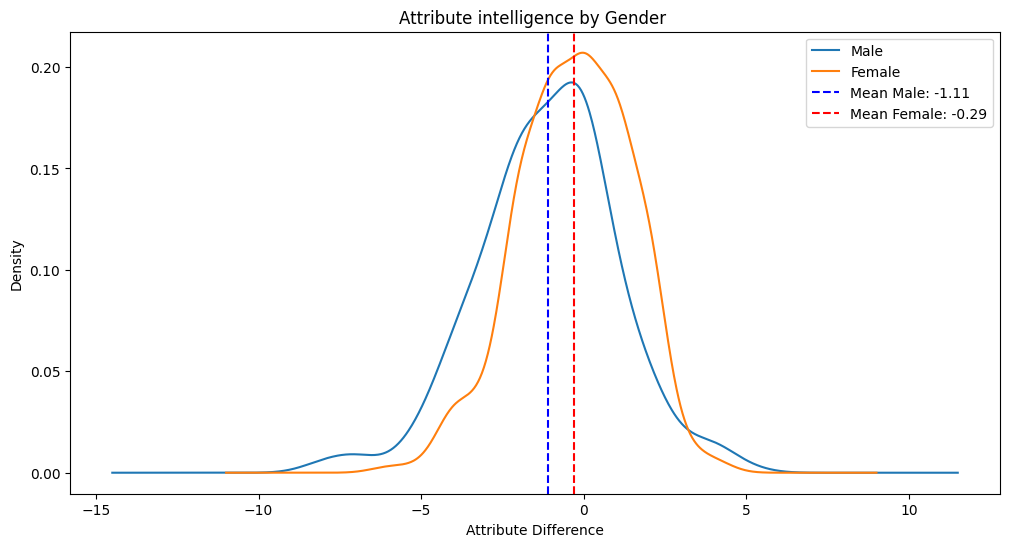

In [ ]:
male_data = participant_data.loc[participant_data['gender'] == 1]  
female_data = participant_data.loc[participant_data['gender'] == 0]  
intel_diff_male = male_data['intel_diff']
intel_diff_female = female_data['intel_diff']
mean_male = intel_diff_male.mean()
mean_female = intel_diff_female.mean()
plt.figure(figsize=(12, 6))
intel_diff_male.plot.density(label='Male')
intel_diff_female.plot.density(label='Female')
plt.axvline(x=mean_male, color='blue', linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.axvline(x=mean_female, color='red', linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.xlabel('Attribute Difference')
plt.ylabel('Density')
plt.title('Attribute intelligence by Gender ')
plt.legend()
plt.show()

Regarding intelligence, both genders underestimate themselves, but men more than women.

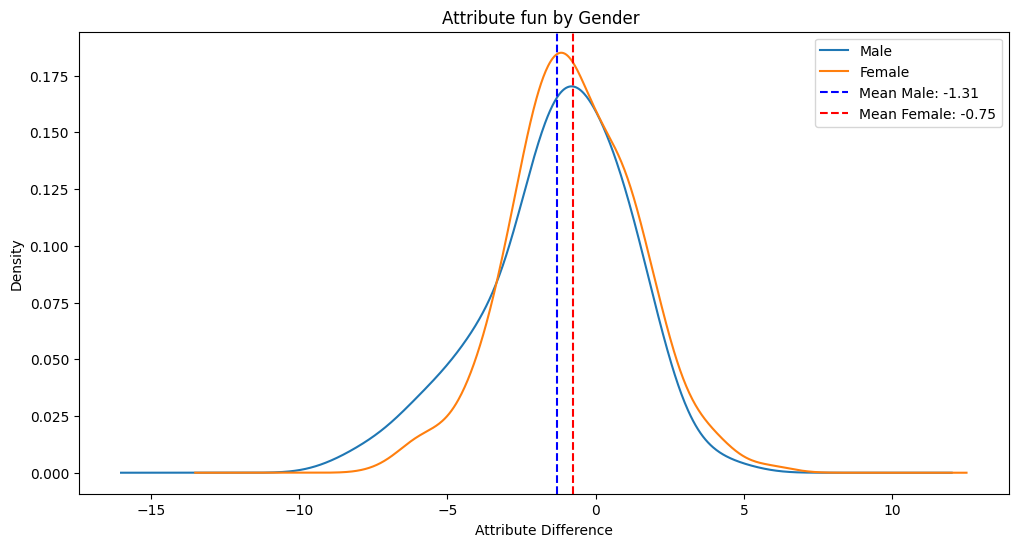

In [ ]:
male_data = participant_data.loc[participant_data['gender'] == 1]  
female_data = participant_data.loc[participant_data['gender'] == 0]  
fun_diff_male = male_data['fun_diff']
fun_diff_female = female_data['fun_diff']
mean_male = fun_diff_male.mean()
mean_female = fun_diff_female.mean()
plt.figure(figsize=(12, 6))
fun_diff_male.plot.density(label='Male')
fun_diff_female.plot.density(label='Female')
plt.axvline(x=mean_male, color='blue', linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.axvline(x=mean_female, color='red', linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.xlabel('Attribute Difference')
plt.ylabel('Density')
plt.title('Attribute fun by Gender ')
plt.legend()
plt.show()

Both genders underestimate themselves when it comes to give a score to there level of fun.

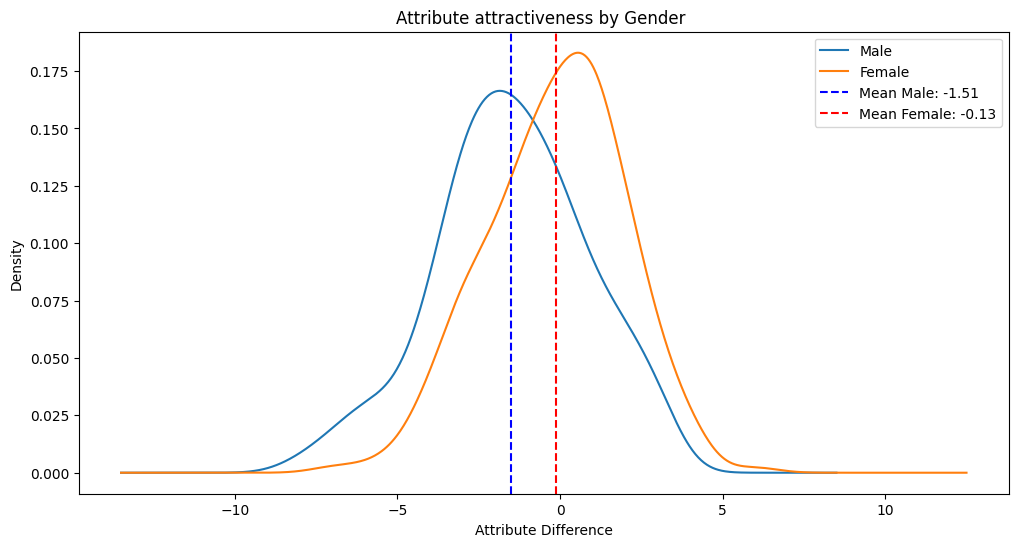

In [ ]:
male_data = participant_data.loc[participant_data['gender'] == 1]  
female_data = participant_data.loc[participant_data['gender'] == 0]  
attr_diff_male = male_data['attr_diff']
attr_diff_female = female_data['attr_diff']
mean_male = attr_diff_male.mean()
mean_female = attr_diff_female.mean()
plt.figure(figsize=(12, 6))
attr_diff_male.plot.density(label='Male')
attr_diff_female.plot.density(label='Female')
plt.axvline(x=mean_male, color='blue', linestyle='--', label=f'Mean Male: {mean_male:.2f}')
plt.axvline(x=mean_female, color='red', linestyle='--', label=f'Mean Female: {mean_female:.2f}')
plt.xlabel('Attribute Difference')
plt.ylabel('Density')
plt.title('Attribute attractiveness by Gender ')
plt.legend()
plt.show()

And when it comes to physical appearance, there is a significant gap between men and women. Men underestimate themselves much more than women.

So, in conclusion, regarding the question of the relevance of self-assessments, individuals tend to underestimate themselves in general, regardless of gender.

* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

Match vs No-Match :

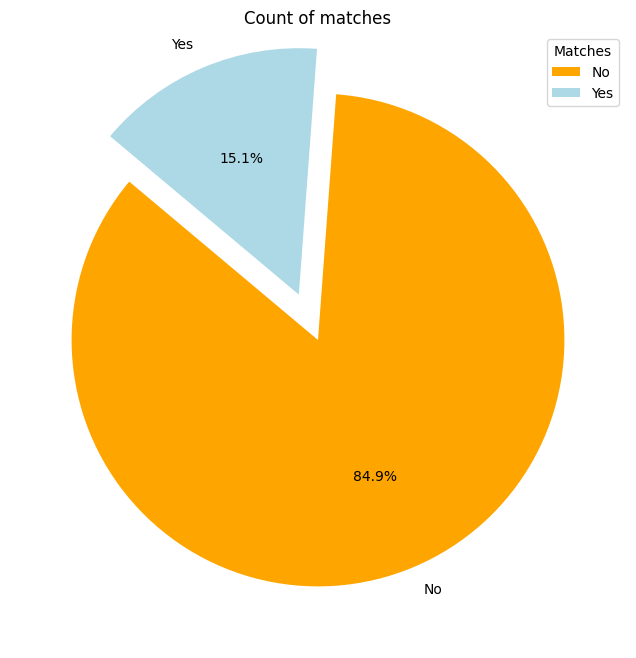

In [ ]:
match_counts = df_filtered['match'].value_counts()
labels = ['No', 'Yes']
colors = ['orange', 'lightblue']
pull = [0, 0.20]

# Diagramme circulaire (camembert)
plt.figure(figsize=(12, 8))
plt.pie(match_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=pull)
plt.title('Count of matches')
plt.legend(title='Matches')
plt.show()

Only 15.1% of the people who participated had a second date.

So now that we know how many people had a match, let's focus on understanding if position plays a role in the number of matches?

<Figure size 1800x800 with 0 Axes>

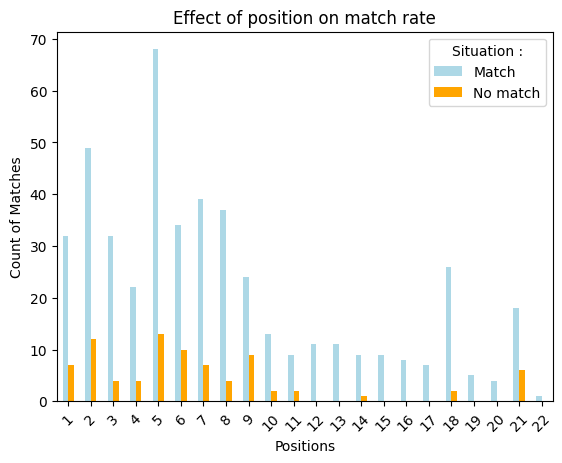

In [ ]:
sorted_positions = sorted(df_filtered['position'].unique())
sorted_df = df_filtered.sort_values(by='position')
plt.figure(figsize=(18, 8))
sorted_df.groupby(['position', 'match']).size().unstack().plot(kind='bar', stacked=False, color=['lightblue', 'orange'])
plt.xlabel('Positions')
plt.ylabel('Count of Matches')
plt.title('Effect of position on match rate')
plt.legend(title='Situation :', labels=['Match', 'No match'])
plt.xticks(range(len(sorted_positions)), sorted_positions, rotation=45)
plt.show()

We can clearly see that the majority of matches occurred very early in the order of positions.

The document provided indicates a change in attribute rating methods between waves 6 and 9. To maintain consistency and mitigate discrepancies stemming from this change, we opt to normalize all data.

Let's try to identify the trend:

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\451246968.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\451246968.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\451246968.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

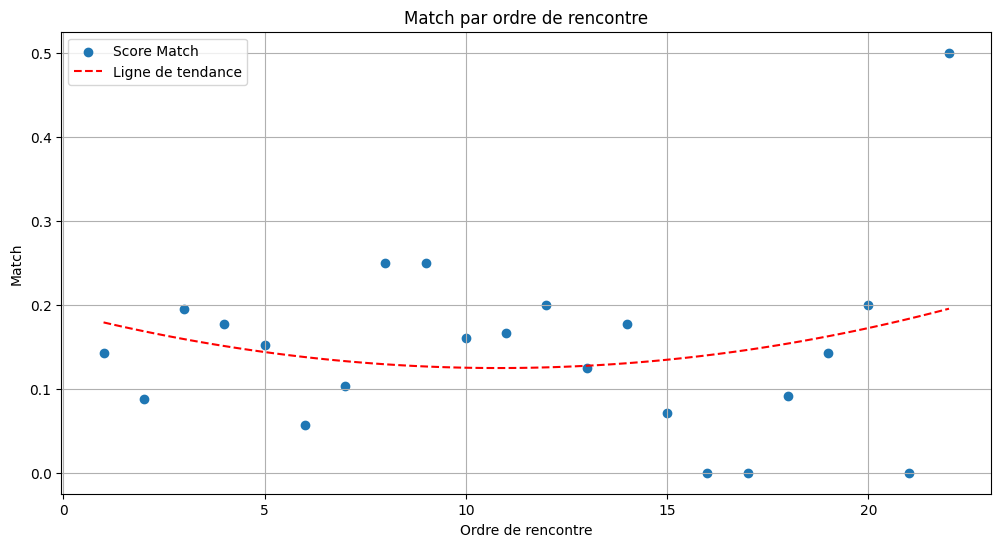

In [ ]:

# Exclure les événements 6-9 car il y'a eu un changement dans la facon de noté
filtered_data = df_filtered[(df_filtered['wave'] > 9) | (df_filtered['wave'] < 6)]
filtered_data['sum_attributes'] = filtered_data['attr1_1'] + filtered_data['sinc1_1'] + filtered_data['intel1_1'] + filtered_data['fun1_1'] + filtered_data['amb1_1'] + filtered_data['shar1_1']

filtered_data['attr1_1_normalized'] = filtered_data['attr1_1'] / (filtered_data['sum_attributes'] / 100)
filtered_data['sinc1_1_normalized'] = filtered_data['sinc1_1'] / (filtered_data['sum_attributes'] / 100)
filtered_data['intel1_1_normalized'] = filtered_data['intel1_1'] / (filtered_data['sum_attributes'] / 100)
filtered_data['amb1_1_normalized'] = filtered_data['amb1_1'] / (filtered_data['sum_attributes'] / 100)
filtered_data['shar1_1_normalized'] = filtered_data['shar1_1'] / (filtered_data['sum_attributes'] / 100)

matches_by_order = filtered_data.groupby('order')['match'].mean().reset_index()
coefficients = np.polyfit(matches_by_order['order'], matches_by_order['match'], 2)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(min(matches_by_order['order']), max(matches_by_order['order']), 100)
y_values = polynomial(x_values)
plt.figure(figsize=(12, 6))
plt.scatter(matches_by_order['order'], matches_by_order['match'], label='Score Match')
plt.plot(x_values, y_values, color='red', linestyle='--', label='Ligne de tendance')
plt.title('Match par ordre de rencontre')
plt.xlabel('Ordre de rencontre')
plt.ylabel('Match')
plt.legend()
plt.grid(True)
plt.show()


As the event unfolds, the probability of finding a match diminishes. Nonetheless, as it approaches its conclusion, especially during the final five interactions, individuals might intensify their efforts to secure a match, resulting in a resurgence of the likelihood of finding one.

In conclusion, during this event, matches are more likely to occur at the beginning rather than at the end.

* Do shared interests increase the likelihood of a second date?

To answer this question, we will see how many matches and no-matches occur at different levels of interest correlation among participants

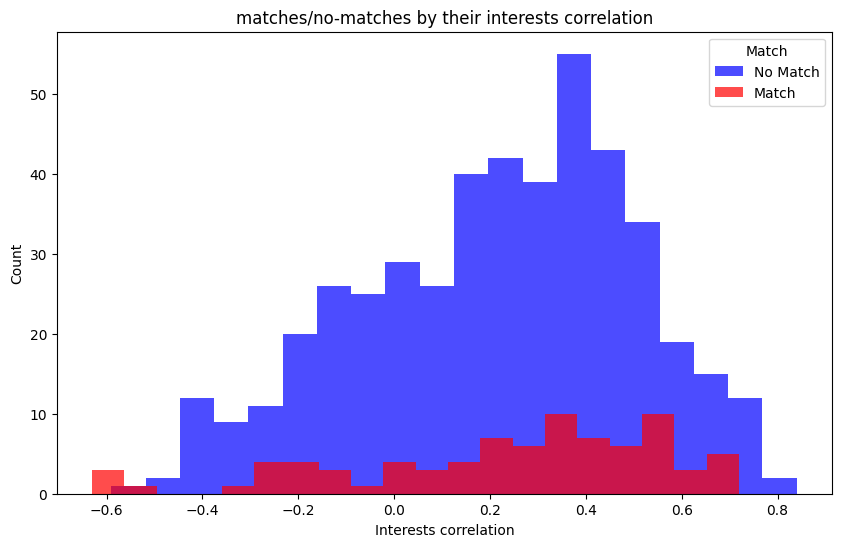

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_filtered[df_filtered['match']==0]['int_corr'], color='blue', alpha=0.7, bins=20, label='No Match')
plt.hist(df_filtered[df_filtered['match']==1]['int_corr'], color='red', alpha=0.7, bins=20, label='Match')
plt.xlabel('Interests correlation')
plt.ylabel('Count')
plt.title("matches/no-matches by their interests correlation")
plt.legend(title='Match')
plt.show()

Regardless of the correlation, we see that it has no impact on the match rate. In other words, during this event, individuals set aside the fact that they may not necessarily share the same interests and still granted a second date to the person.

* If common interests don't bring more matches, then one might wonder if money does :

C:\Users\Neron\AppData\Local\Temp\ipykernel_10924\2330368660.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





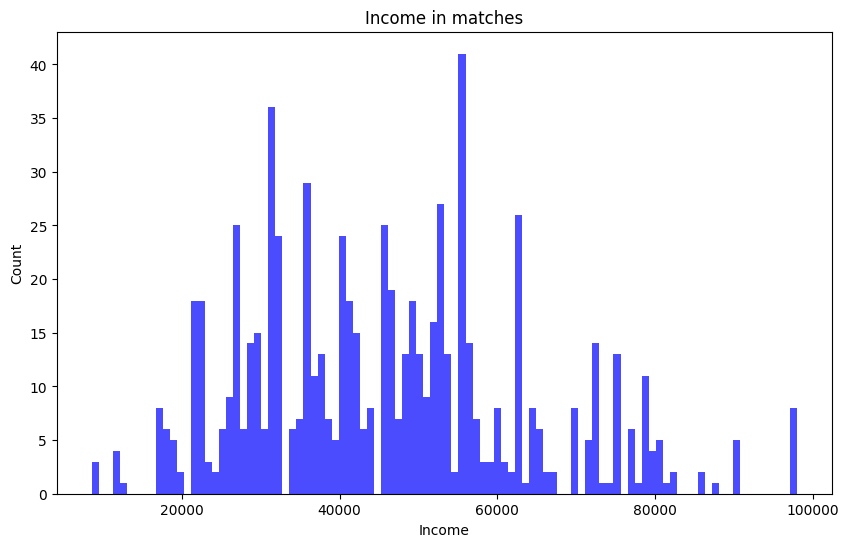

In [ ]:
import matplotlib.pyplot as plt

# Convertir en numérique
n_income = []
df['income'].fillna(-1, inplace=True)
for val in df['income'].values:
    if val == -1:
        n_income.append(-1)
    else:
        # Convertir en chaîne de caractères et extraire la partie entière
        val_str = str(val)
        if '.' in val_str:
            val_int = int(val_str.split('.')[0].replace(',', ''))
            n_income.append(val_int)
        else:
            n_income.append(int(val_str.replace(',', '')))
df['income'] = n_income

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df[(df['match'] == 1) & (df['income'] != -1)]['income'], bins=100, color='blue', alpha=0.7)

# Mise à jour des axes
plt.xlabel('Income')
plt.ylabel('Count')

# Mise à jour du titre
plt.title("Income in matches")

# Affichage du graphique
plt.show()


We notice that regardless of the income, it doesn't necessarily result in more matches.


* Does any particular interest stand out that might increase the chances of getting a second date?

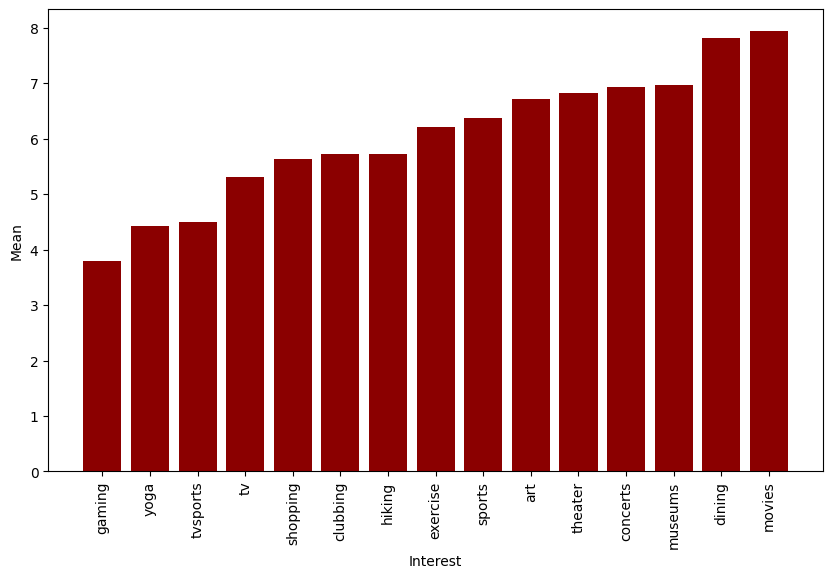

In [ ]:
# Select columns of interest and calculate mean
int_ = speed_dating_filtered[['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'tv', 'theater', 'movies', 'concerts', 'shopping', 'yoga']].mean()

# Reshape data from wide to long format
intl = pd.DataFrame(int_.items(), columns=['interest', 'mean']).sort_values('mean')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(intl['interest'], intl['mean'], color='darkred')
plt.xlabel('Interest')
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.show()

A large portion of the panel prefers having dinner and watching a movie.

In [ ]:
display(df_filtered['match'].corr(df_filtered['race_o']))
display(df_filtered['match'].corr(df_filtered['attr1_1']))


0.051775229987810534

0.05787129948197538

As noted, achieving a 'match' doesn't seem to follow strict patterns, as variables like income and shared interests don't appear to have a significant impact on the outcome.

## Conclusion

The project aimed to assist Tinder's marketing team in understanding why matches were decreasing. To achieve this, our objectives were to comprehend what drew people to each other.

Upon reviewing the provided documents, it became evident that the data was collected during a speed dating event. Understanding Tinder, it's clear that its operation differs significantly from speed dating, despite both aiming to facilitate encounters. Tinder operates on a swiping system where users swiftly move on to the next potential match, unlike speed dating events where participants have allocated time to converse with each other. This major difference posed an initial challenge.

Another issue concerns the sample, as we have 552 individuals from the same geographic area (zipcode), which is not representative of a broader population. Adding to this, 25% of the data is missing, and there's also the challenge of a change in the rating system midway through the process, necessitating the use of normalization to retain as much usable data as possible.

Despite these challenges, the analysis revealed some notable traits that could potentially be utilized by the marketing and development teams to improve partner presentations and consequently increase the number of matches.

One of the most striking findings during the analysis was the significance of physical appearance, regardless of gender. Age disparities were also observed to impact matches. Racial identity also played a notable role in matches for certain ethnicities. Surprisingly, sharing 'cliché' interests such as having dinner and watching a movie increased the chances of a second date. However, it's worth noting that the database only accounts for heterosexual couples. Considering current times, having a panel of gay couples would have been useful, not only to gather more data and understand certain trends but also to mechanically increase match rates.

In conclusion, there's no magic recipe for getting more matches, but there are numerous points that can be improved to increase these chances.